## Load Data

In [1]:
#Import initial packages and data.

import pandas as pd
import seaborn as sns
sns.set_context('notebook')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings as wrns
wrns.filterwarnings('ignore')
data = pd.read_csv('train.csv')
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SalePrice
0,20,RL,NaN,7000,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,GdWo,NaN,0,7,2009,WD,136500
1,20,RL,70.0,11767,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,Shed,900,6,2009,WD,120000
2,60,RL,75.0,9675,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2009,WD,253000
3,160,FV,24.0,2160,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2008,WD,170000
4,75,RM,65.0,8850,Pave,NaN,IR1,Bnk,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,7,2006,ConLw,144000


## Missing Data Handling 

In [2]:
#Seperate data by variable types.

Continuous = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
              '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF',
              'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','SalePrice']

Discrete = ['GarageYrBlt', 'YearRemod/Add', 'YearBuilt', 'BsmtFullBath','FullBath','HalfBath','BedroomAbvGr',
            'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','YrSold']

Ordinal=['Utilities','LotShape','LandSlope','OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual',
         'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','Electrical','KitchenQual',
         'Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence']

Nominal = ['MSSubClass','MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood','Condition1',
           'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
           'MasVnrType','Foundation','Heating','CentralAir','GarageType','MiscFeature','SaleType']


In [3]:
#Define function to find missing values.

def num_missing(x):
  return sum(x.isnull())

In [4]:
#Find number of missing values for continuous variables.

print ('Missing values for continuous variables:')
missing_con = pd.DataFrame(data[Continuous].apply(num_missing, axis=0)[data[Continuous].apply(num_missing, axis=0)>0])
missing_con

Missing values for continuous variables:


,0
LotFrontage,157
MasVnrArea,4


In [5]:
#Find number of missing values for discrete variables.

print ('Missing values for discrete variables:')
missing_dis = pd.DataFrame(data[Discrete].apply(num_missing, axis=0)[data[Discrete].apply(num_missing, axis=0)>0])
missing_dis

Missing values for discrete variables:


,0
GarageYrBlt,36


In [6]:
#Find number of missing values for ordinal variables.

print ('Missing values for ordinal variables:')
missing_ord = pd.DataFrame(data[Ordinal].apply(num_missing, axis=0)[data[Ordinal].apply(num_missing, axis=0)>0])
missing_ord

Missing values for ordinal variables:


,0
BsmtQual,21
BsmtCond,21
BsmtExposure,22
BsmtFinType1,21
BsmtFinType2,21
FireplaceQu,386
GarageFinish,36
GarageQual,36
GarageCond,36
PoolQC,801


In [7]:
#Find number of missing values for nominal variables.

print ('Missing values for nominal variables:')
missing_nom = pd.DataFrame(data[Nominal].apply(num_missing, axis=0)[data[Nominal].apply(num_missing, axis=0)>0])
missing_nom

Missing values for nominal variables:


,0
Alley,749
MasVnrType,4
GarageType,36
MiscFeature,781


In [8]:
#Filter out rows where MasVnrArea data is missing arbitrarily. This calls into question the entire row.

data = data[data['MasVnrArea'] >= 0]

#Fill object type blanks with NA or 0 as appropriate. Doing one by one instead of loop to easily see all altered variables.
#GarageYrBlt left as is and will be dealt with at later stage.

data['LotFrontage'] = data['LotFrontage'].fillna(0)
data['Alley'] = data['Alley'].fillna('NA')
data['BsmtQual'] = data['BsmtQual'].fillna('NA')
data['BsmtCond'] = data['BsmtCond'].fillna('NA')
data['BsmtExposure'] = data['BsmtExposure'].fillna('NA')
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('NA')
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('NA')
data['FireplaceQu'] = data['FireplaceQu'].fillna('NA')
data['GarageType'] = data['GarageType'].fillna('NA')
data['GarageFinish'] = data['GarageFinish'].fillna('NA')
data['GarageQual'] = data['GarageQual'].fillna('NA')
data['GarageCond'] = data['GarageCond'].fillna('NA')
data['PoolQC'] = data['PoolQC'].fillna('NA')
data['Fence'] = data['Fence'].fillna('NA')
data['MiscFeature'] = data['MiscFeature'].fillna('NA')

## Exploratory Data Analysis and Data Processing

In [9]:
#Import statistical packages for later use.

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [10]:
#Convert MSSubClass to string since it is nominal but read in to python as numerical.

data['MSSubClass'] = data['MSSubClass'].astype(str)

#Create variables for age of house and age of garage to use instead of YearBlt, YearRemod/Add and GarageYrBlt.

data['AgeHouse'] = (data['YrSold'] - data['YearRemod/Add']).astype(float)
data['AgeGarage'] = (data['YrSold'] - data['GarageYrBlt']).astype(float)

#Replace AgeGarage blanks with 0 and append variables to continuous list.

data['AgeGarage'] = data['AgeGarage'].fillna(0)
Continuous.append('AgeHouse')
Continuous.append('AgeGarage')
del Discrete[0]

#### Continuous variables

In [11]:
#Create table to describe continous variables.

table = data[Continuous].describe()
table.loc['skewness']= data.skew()
table.loc['kurtosis']= data.kurt()
table.round(2)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,AgeHouse,AgeGarage
count,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,...,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00
mean,54.91,10022.18,100.63,434.65,57.28,527.46,1019.39,1128.41,330.99,2.57,...,95.75,43.66,23.88,3.05,16.38,1.36,24.41,175192.09,24.99,31.08
std,33.60,7740.10,179.79,416.42,187.34,414.07,398.46,357.81,416.43,28.59,...,129.63,61.18,62.64,28.03,54.55,24.67,212.79,70092.24,20.54,24.88
min,0.00,1300.00,0.00,0.00,0.00,0.00,0.00,442.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,35000.00,0.00,0.00
25%,32.75,7500.00,0.00,0.00,0.00,212.25,791.75,864.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,129500.00,6.00,8.00
50%,61.00,9474.00,0.00,386.00,0.00,440.00,967.00,1071.00,0.00,0.00,...,0.00,21.00,0.00,0.00,0.00,0.00,0.00,158225.00,18.00,30.00
75%,78.00,11449.50,150.75,697.25,0.00,768.25,1232.00,1337.00,700.50,0.00,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,205250.00,44.00,49.00
max,155.00,164660.00,1224.00,2257.00,1526.00,1958.00,2846.00,2696.00,1619.00,390.00,...,690.00,365.00,368.00,508.00,291.00,576.00,4500.00,615000.00,60.00,99.00
skewness,-0.32,11.56,2.56,0.84,4.02,0.93,0.42,0.95,0.76,12.10,...,1.51,1.81,2.84,11.72,3.31,20.21,14.67,1.59,0.39,0.56
kurtosis,-0.52,207.77,8.37,0.38,17.45,0.47,1.49,1.34,-0.80,150.11,...,2.35,3.48,7.73,165.28,9.84,430.81,267.97,4.30,-1.38,-0.55


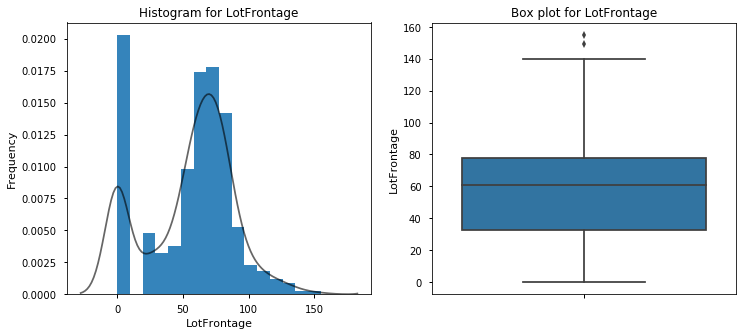

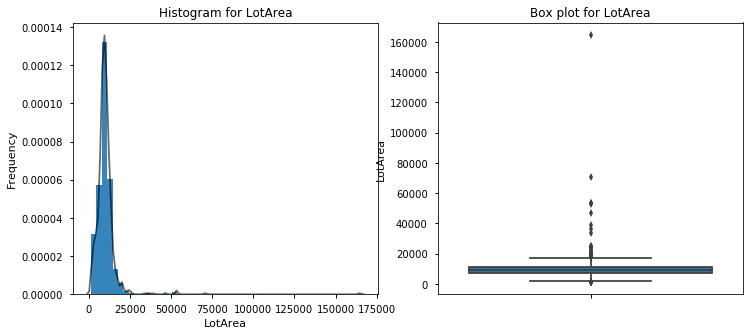

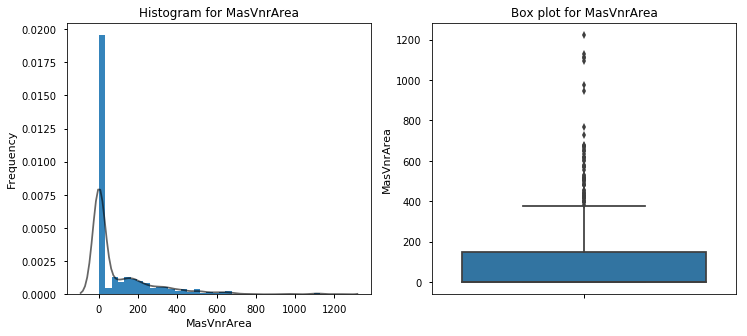

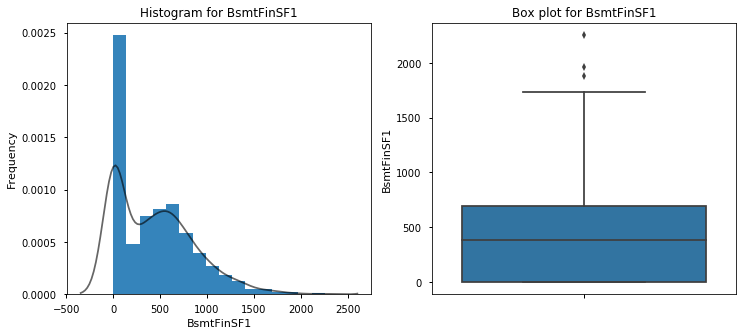

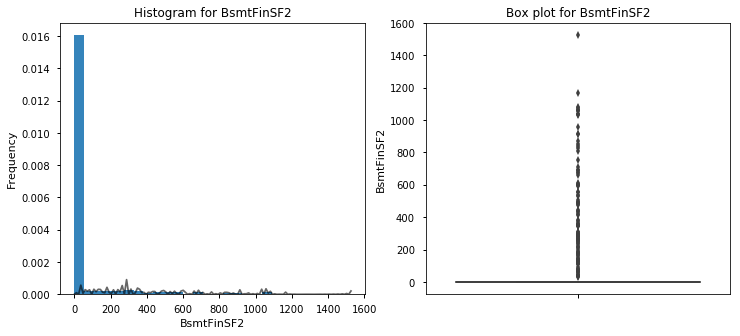

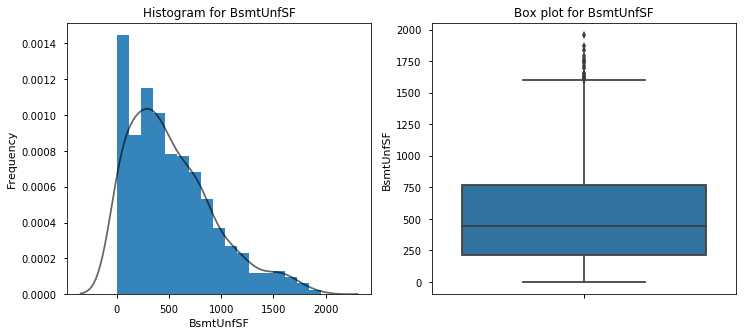

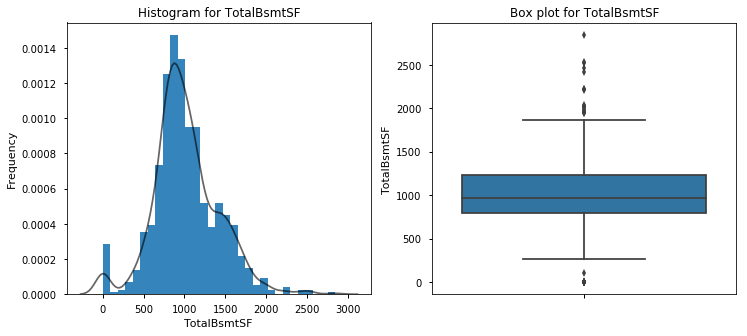

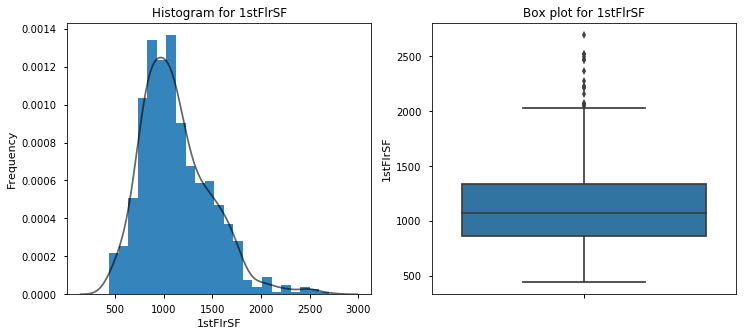

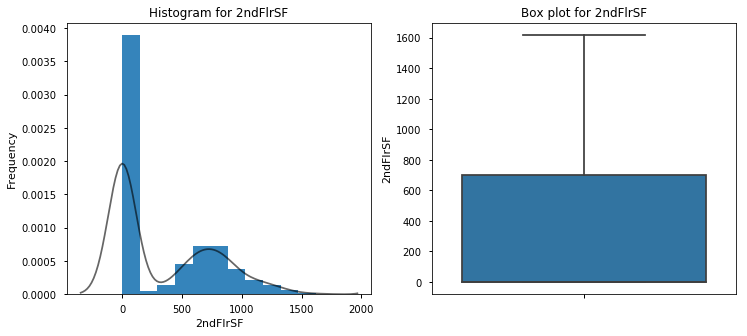

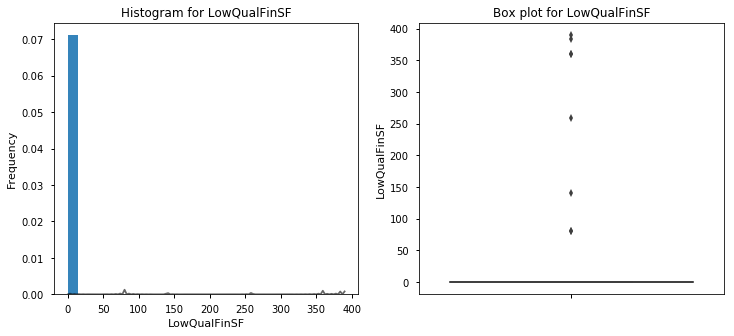

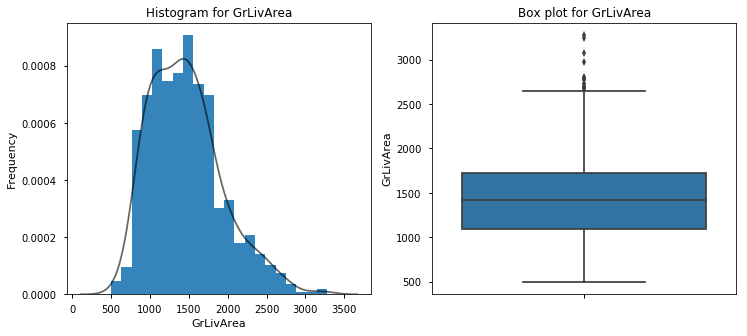

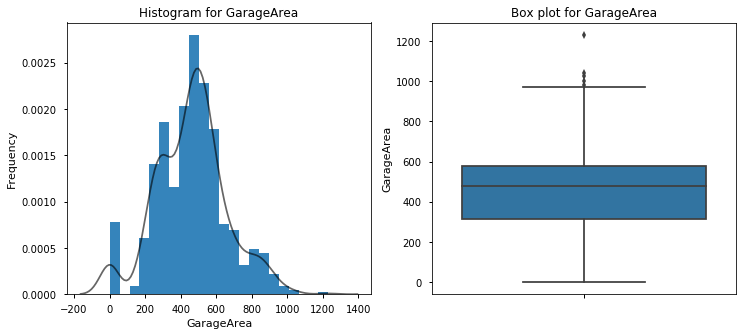

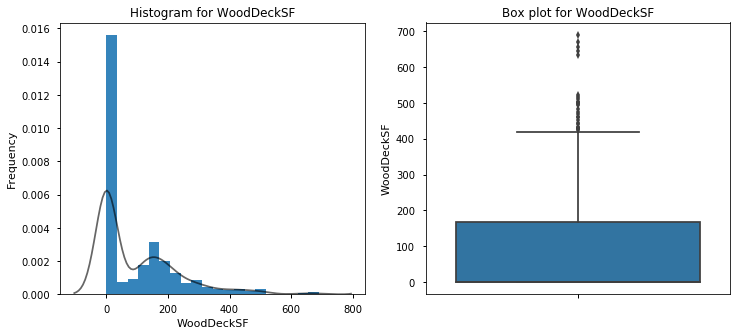

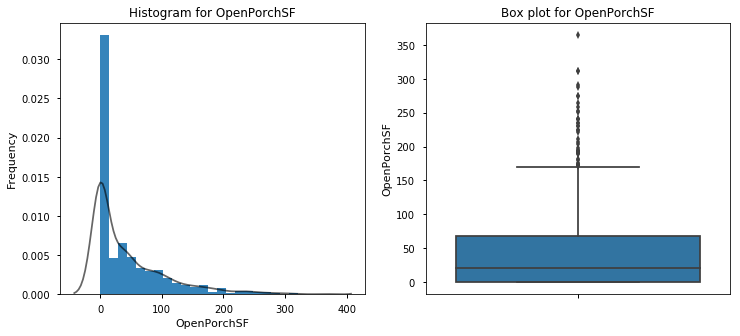

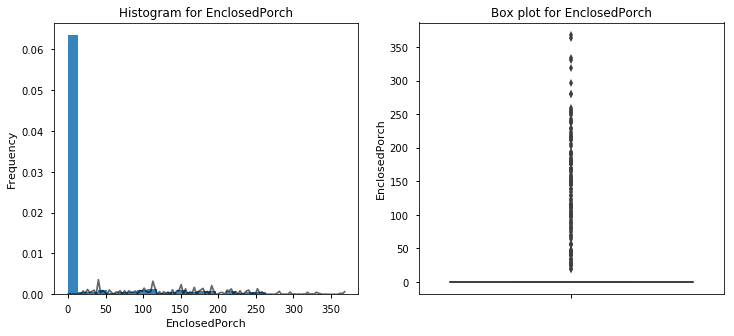

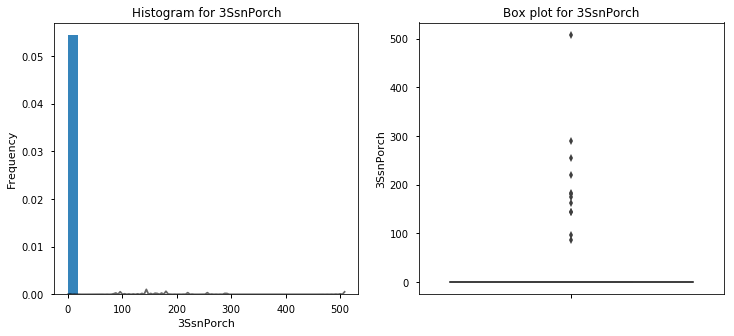

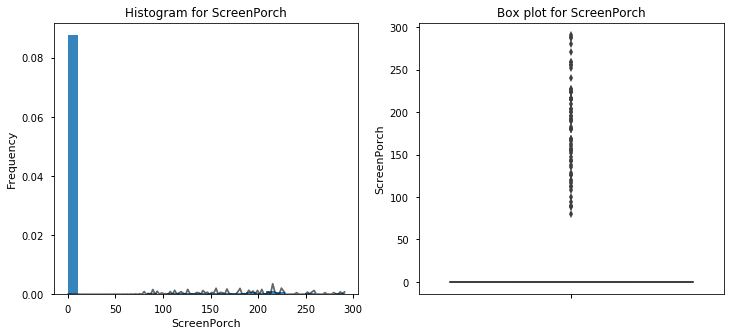

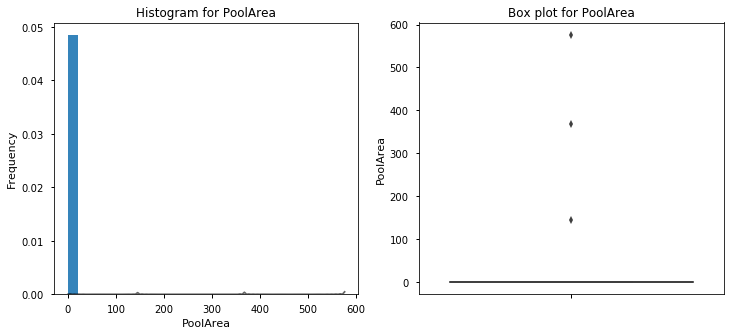

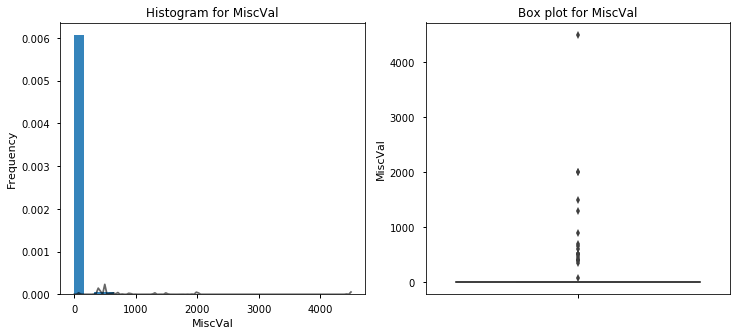

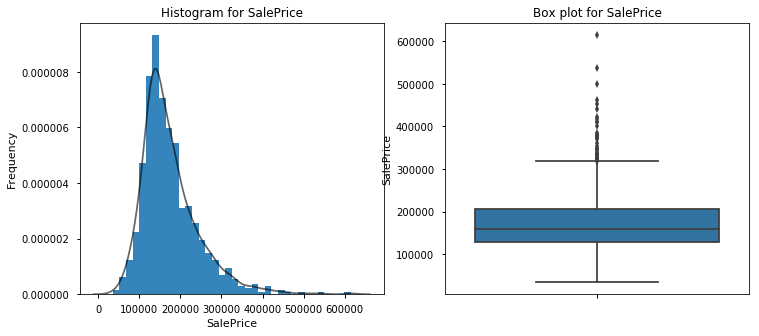

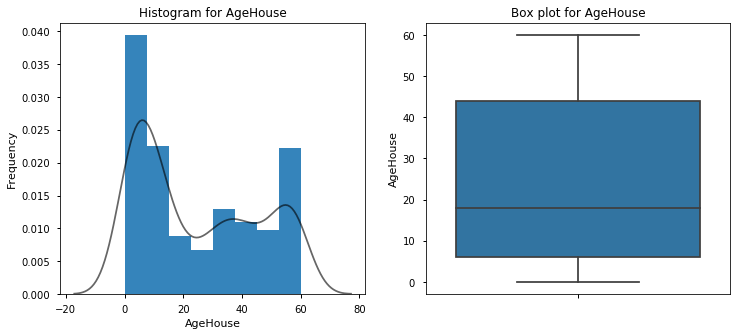

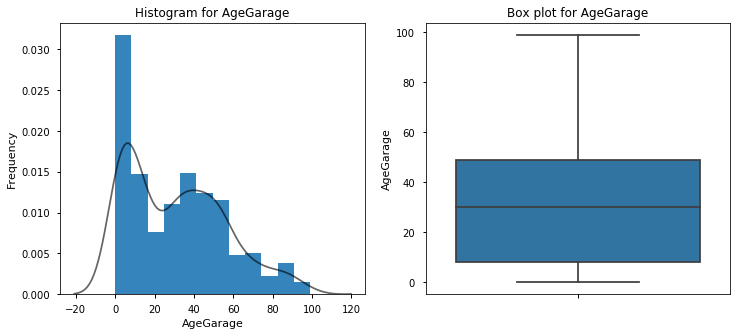

In [12]:
#Create histograms and box plots for continuous variables and variables treated as continuous. Then save graphs as pictures.

for i in Continuous:
    fig,ax=plt.subplots(1,2,figsize=(12,5))
    sns.distplot(data[i],ax=ax[0],hist_kws={'alpha':0.9},kde_kws={'color':'black','alpha':0.6})
    ax[0].set(ylabel='Frequency', title='Histogram for {}'.format(i), xlabel=i)
    sns.boxplot(data[i],orient='v',ax=ax[1])
    ax[1].set(title='Box plot for {}'.format(i), ylabel=i)
    #fig.savefig('{}.png'.format(i))

In [13]:
#Create LogSalePrice transformations for suspected right skew in SalePrice.

data['LogSalePrice'] = np.log(data['SalePrice'])

In [14]:
#Print skew values before and after log transformation.

skew_std_err = 6/np.sqrt(len(data))
print('standard error of skewness = {}'.format(skew_std_err))
skew_before = data['SalePrice'].skew()
skew_after = data['LogSalePrice'].skew()
print('skew before log transformation = {}'.format(skew_before))
print('skew after log transformation = {}'.format(skew_after))

standard error of skewness = 0.21213203435596426
skew before log transformation = 1.589554627738627
skew after log transformation = 0.1144473147853749


In [15]:
#Remove anything that is more than 3 standard deviations from the mean to correct for outliers.
#Done on Sale Price rather than LogSalePrice.

data_removed_outliers = data[data['SalePrice']<500000]

In [16]:
#Print skew after outliers removed and LogSalePrice used. Skewness almost 0.

skew_after = data_removed_outliers['LogSalePrice'].skew()
print('skew after log transformation and removed outliers = {}'.format(skew_after))

skew after log transformation and removed outliers = 0.01745699059133181


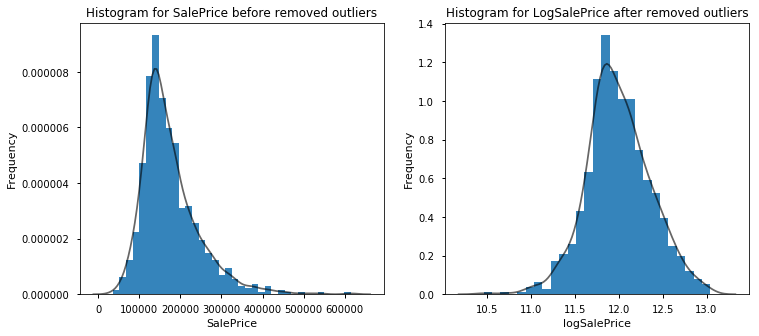

In [17]:
#Histograms of SalePrice before removing outliers (initial) and LogSalePrice after removing outliers (final).
#Save results as picture.

fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.distplot(data['SalePrice'],ax=ax[0],hist_kws={'alpha':0.9},kde_kws={'color':'black','alpha':0.6})
ax[0].set(title='Histogram for SalePrice before removed outliers', xlabel='SalePrice', ylabel='Frequency')
sns.distplot(data_removed_outliers['LogSalePrice'],ax=ax[1],hist_kws={'alpha':0.9},kde_kws={'color':'black','alpha':0.6})
ax[1].set(title='Histogram for LogSalePrice after removed outliers',  xlabel='logSalePrice', ylabel='Frequency')
fig.savefig('histogram for saleprice before and after removed outliers.png')

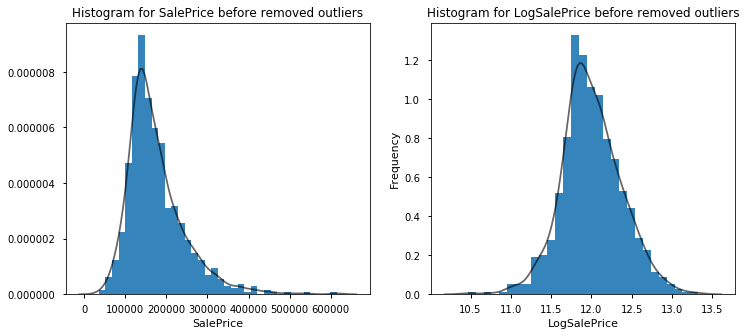

In [19]:
#Histogram of SalePrice and LogSalePrice before removed outliers.

fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.distplot(data['SalePrice'],ax=ax[0],hist_kws={'alpha':0.9},kde_kws={'color':'black','alpha':0.6})
ax[0].set(title='Histogram for SalePrice before removed outliers', xlabel='SalePrice')
sns.distplot(data['LogSalePrice'],ax=ax[1],hist_kws={'alpha':0.9},kde_kws={'color':'black','alpha':0.6})
ax[1].set(title='Histogram for LogSalePrice before removed outliers', ylabel='Frequency')
fig.savefig('histogram for saleprice before and after removed outliers.png')

[<matplotlib.text.Text at 0x116fed978>, <matplotlib.text.Text at 0x117416b38>]

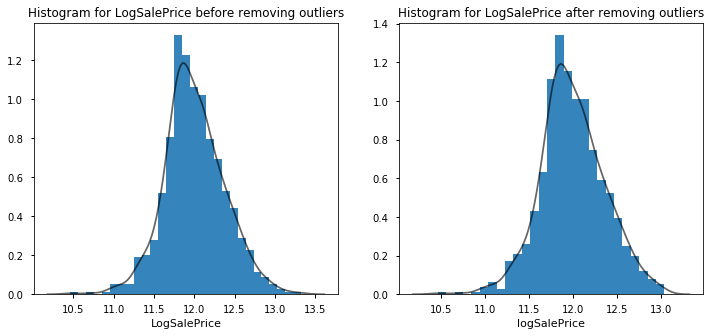

In [20]:
#Histogram of SalePrice and LogSalePrice after removed outliers.

fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.distplot(data['LogSalePrice'],ax=ax[0],hist_kws={'alpha':0.9},kde_kws={'color':'black','alpha':0.6})
ax[0].set(title='Histogram for LogSalePrice before removing outliers', xlabel='LogSalePrice')
sns.distplot(data_removed_outliers['LogSalePrice'],ax=ax[1],hist_kws={'alpha':0.9},kde_kws={'color':'black','alpha':0.6})
ax[1].set(title='Histogram for LogSalePrice after removing outliers', xlabel='logSalePrice')
fig.savefig('Histogram for SalePrice and logSalePrice.png'

In [21]:
#Set transformed data set, data_removed_outliers, as main data.
data = data_removed_outliers

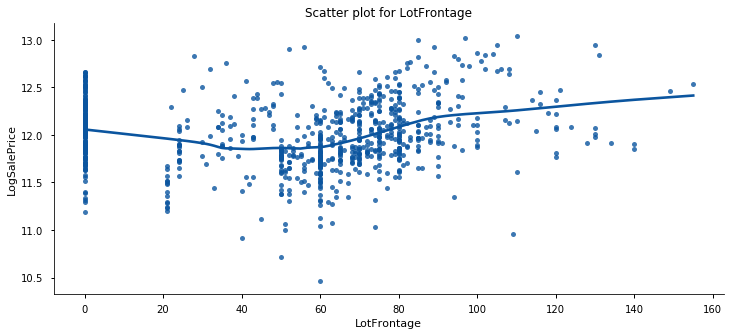

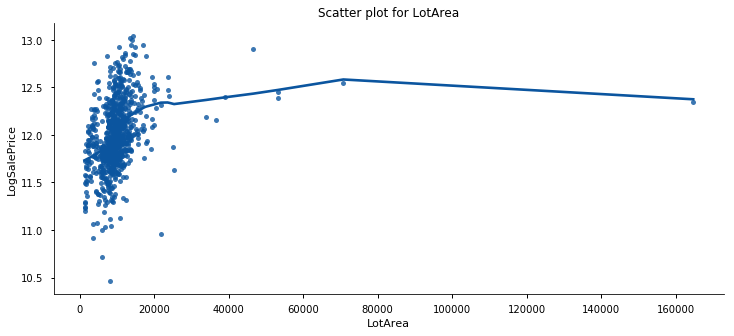

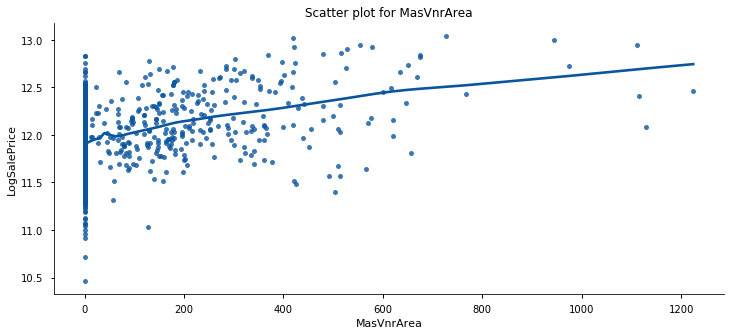

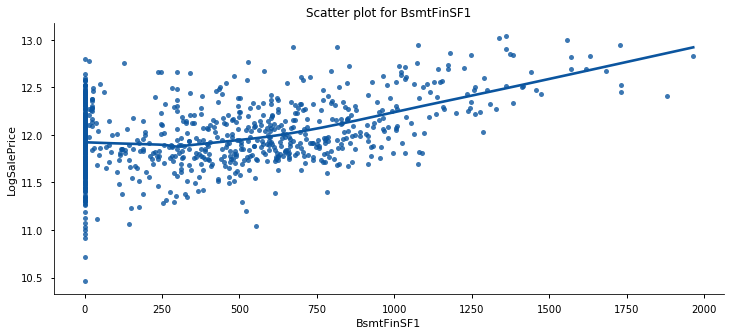

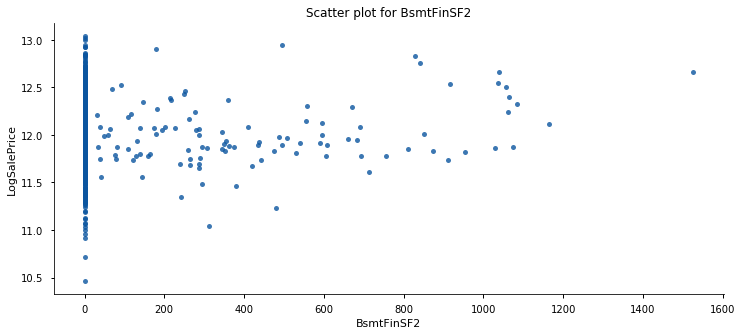

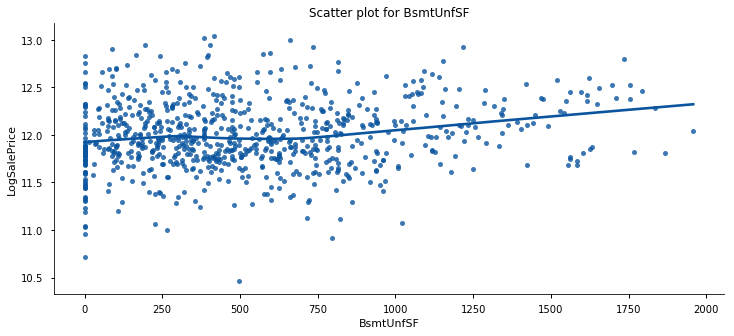

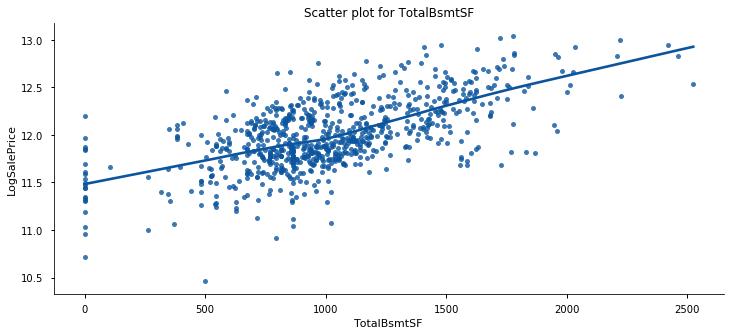

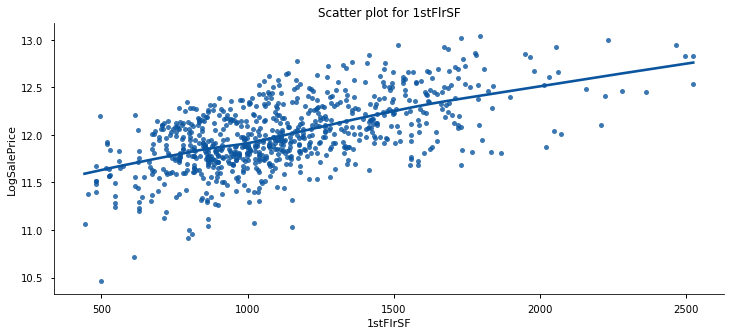

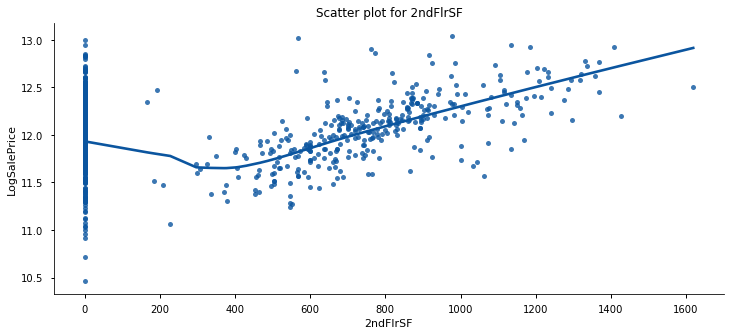

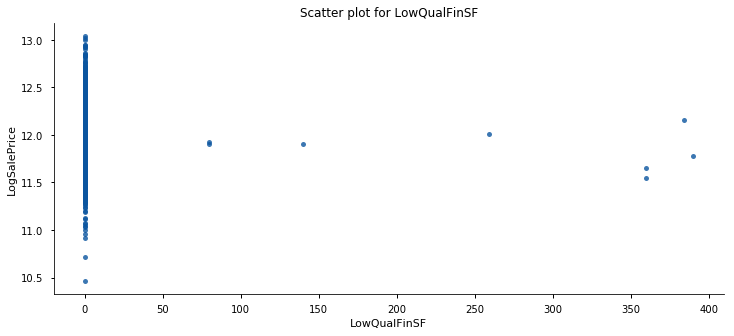

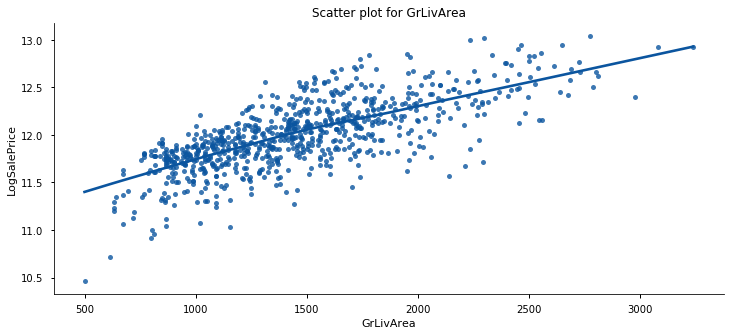

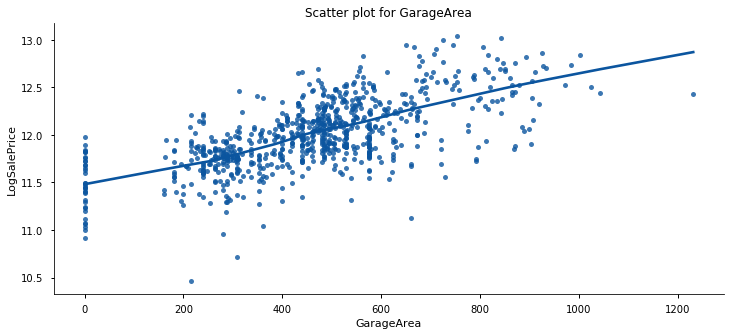

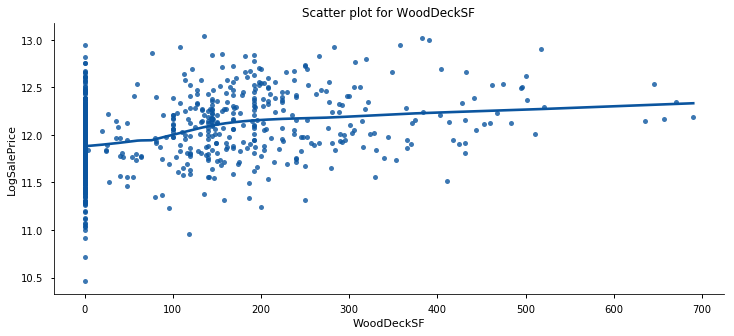

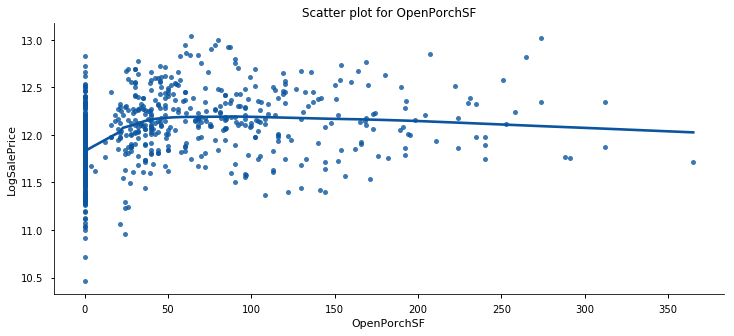

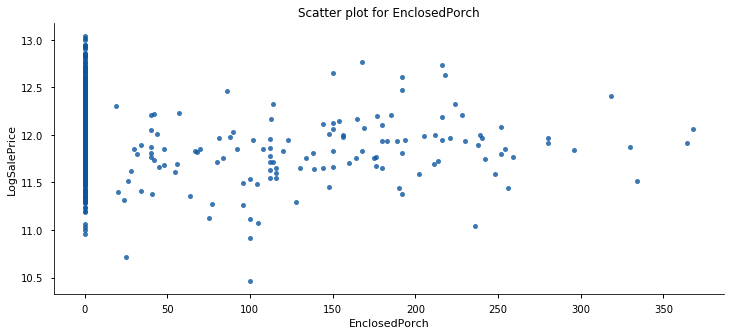

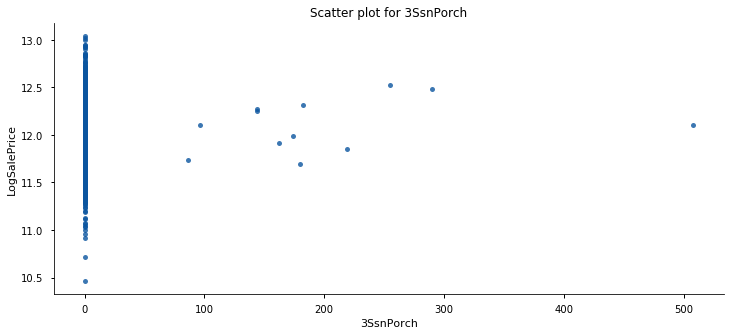

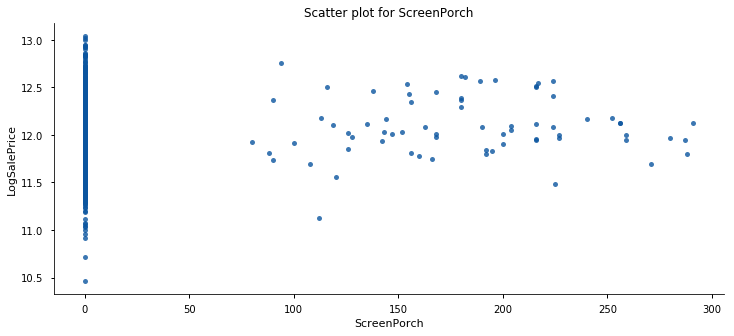

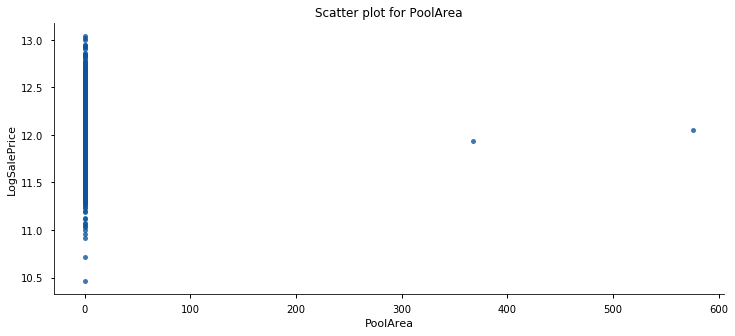

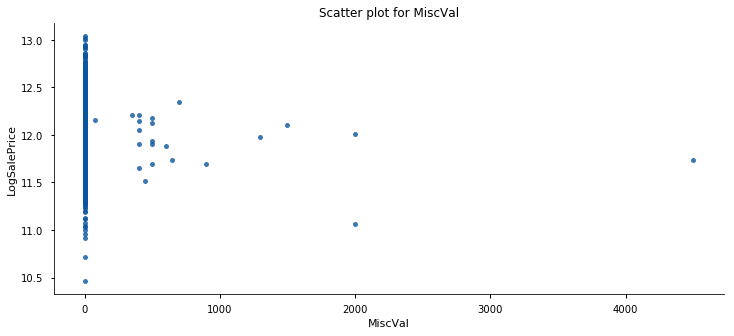

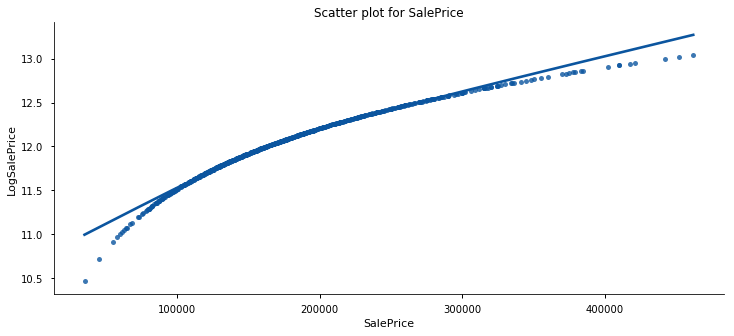

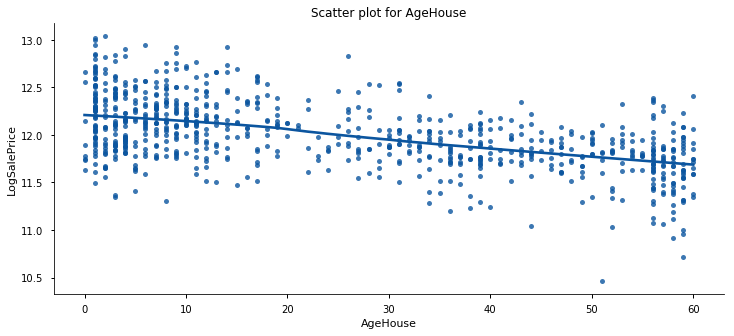

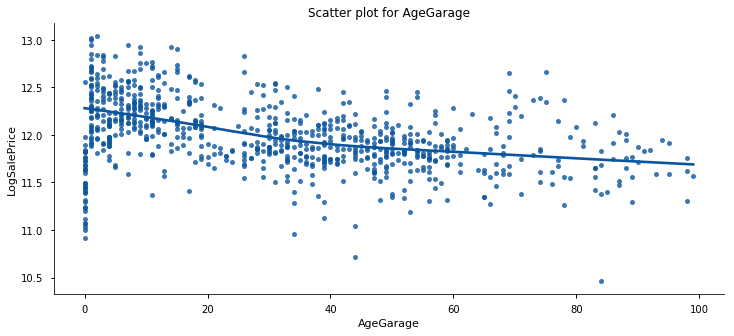

In [22]:
#Draw regression plots for all continuous variables and save the results as picture.
#Some variables which have a linear relationship with SalePrice are MasVnrArea, TotalBsmtSF, 1stFlrSF, GrLivArea, GarageArea.
#Some variables which have a non-linear relationship with SalePrice are BsmtFinSF1, OpenporchSF.
#There could still be some outliers.

for i in Continuous:
    fig,ax=plt.subplots(1,1,figsize=(12,5))
    sns.regplot(data[i], data['LogSalePrice'], scatter_kws = {'s': 25}, lowess=True, color=sns.color_palette('Blues')[-1])
    sns.despine()
    ax.set(ylabel='LogSalePrice', title='Scatter plot for {}'.format(i))
    plt.show()
    fig.savefig('{}.png'.format(i))

In [23]:
#Print number of non-zero values for continuous variables.
#LowQualFinSF, 3SsnPorch, PoolArea, MiscVal have only a little non-zero values so the sample size is insufficient.

print('the number of non-zero value for each continuous varible')
for i in Continuous:
    count = 0
    for m in data[i]:
        if m != 0:
            count += 1
    print('{}:{}'.format(i,count))

the number of non-zero value for each continuous varible
LotFrontage:640
LotArea:797
MasVnrArea:305
BsmtFinSF1:567
BsmtFinSF2:107
BsmtUnfSF:730
TotalBsmtSF:776
1stFlrSF:797
2ndFlrSF:341
LowQualFinSF:8
GrLivArea:797
GarageArea:762
WoodDeckSF:374
OpenPorchSF:415
EnclosedPorch:133
3SsnPorch:12
ScreenPorch:70
PoolArea:2
MiscVal:22
SalePrice:797
AgeHouse:789
AgeGarage:760


#### Discrete variables

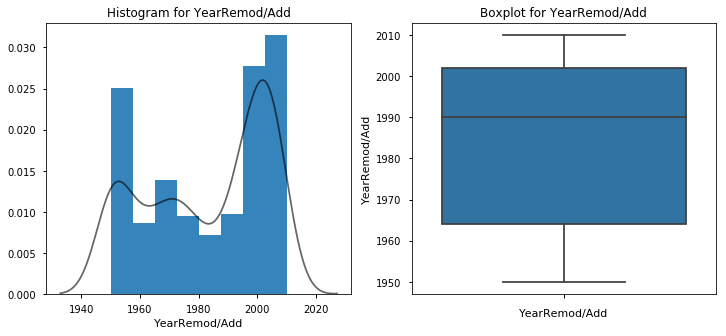

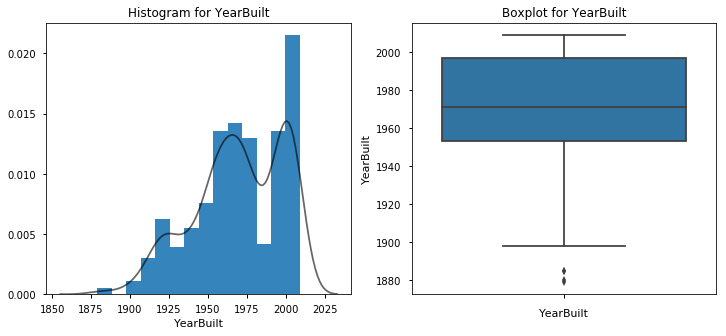

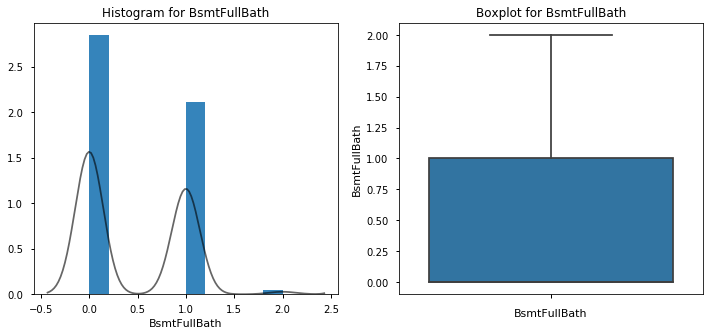

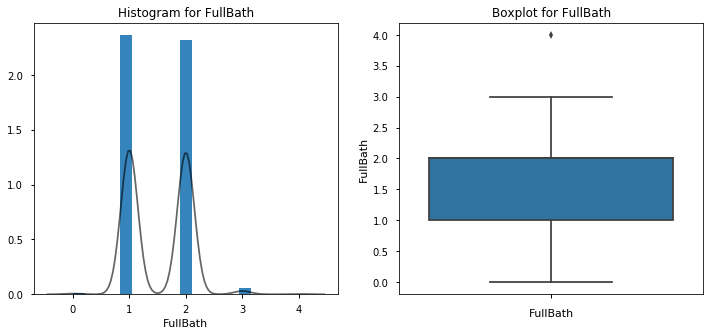

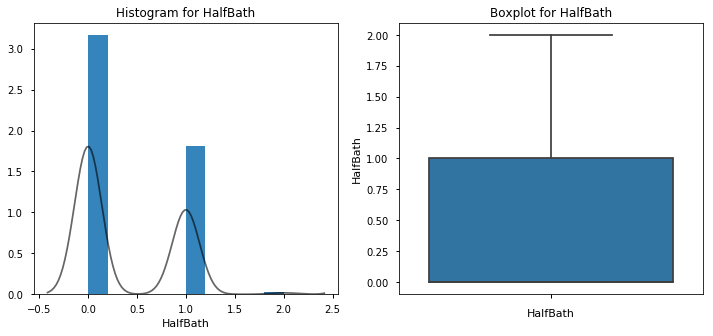

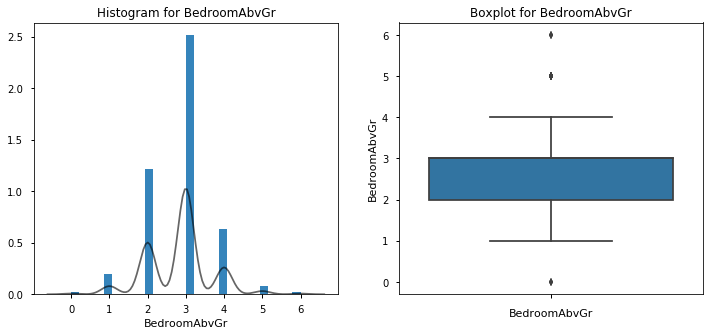

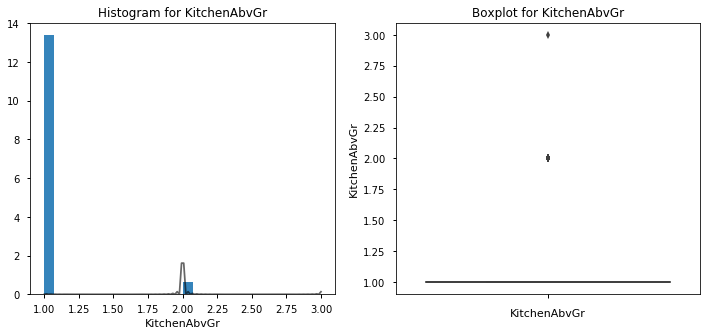

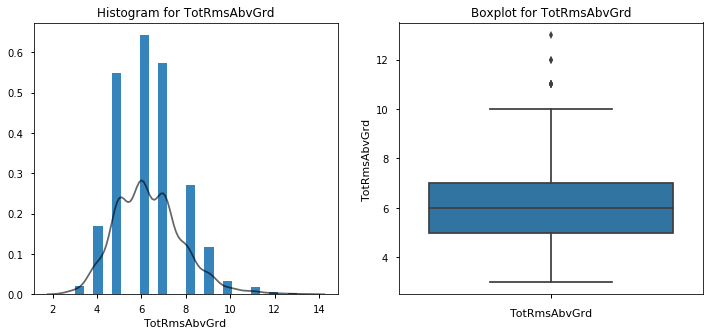

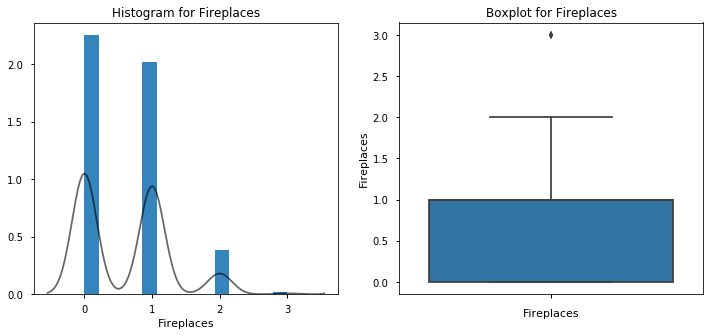

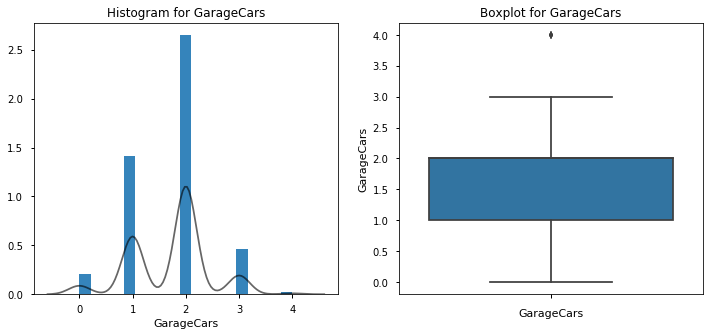

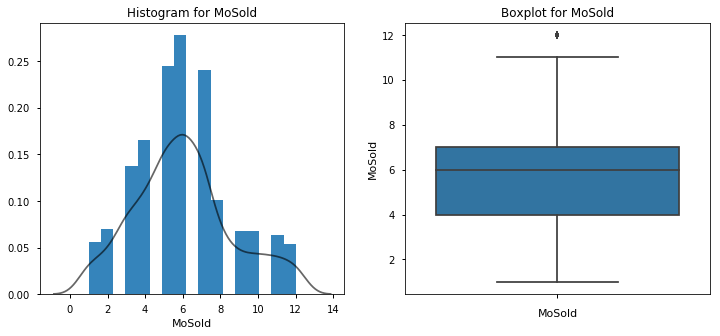

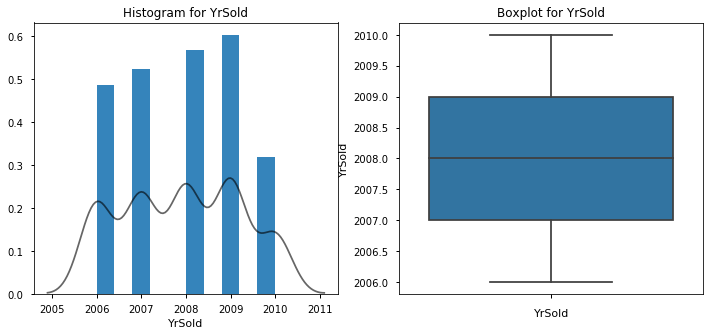

In [24]:
#Plot histograms and box plots for discrete variables and save output as picture.

for i in Discrete:
    fig,ax=plt.subplots(1,2,figsize=(12,5))
    ax[0].set(title='Histogram for {}'.format(i), xlabel=i)
    sns.distplot(data[i],ax=ax[0],hist_kws={'alpha':0.9},kde_kws={'color':'black','alpha':0.6})
    ax[1].set(title='Boxplot for {}'.format(i), xlabel=i)
    sns.boxplot(data[i],orient='v',ax=ax[1])
    fig.savefig('{}.png'.format(i))

In [25]:
#Create table to describe data for discrete variables.

table = data[Discrete].describe()
table.loc['skewness']= data.skew()
table.loc['kurtosis']= data.kurt()
table.round(2)

,YearRemod/Add,YearBuilt,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,YrSold
count,797.00,797.00,797.00,797.00,797.00,797.00,797.00,797.00,797.00,797.00,797.00,797.00
mean,1982.84,1969.50,0.44,1.51,0.37,2.82,1.05,6.33,0.61,1.72,6.01,2007.90
std,20.59,28.47,0.52,0.53,0.50,0.82,0.22,1.47,0.65,0.72,2.62,1.32
min,1950.00,1879.00,0.00,0.00,0.00,0.00,1.00,3.00,0.00,0.00,1.00,2006.00
25%,1964.00,1953.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1.00,4.00,2007.00
50%,1990.00,1971.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,2.00,6.00,2008.00
75%,2002.00,1997.00,1.00,2.00,1.00,3.00,1.00,7.00,1.00,2.00,7.00,2009.00
max,2010.00,2009.00,2.00,4.00,2.00,6.00,3.00,13.00,3.00,4.00,12.00,2010.00
skewness,-0.37,-0.52,0.45,0.25,0.68,0.05,4.69,0.64,0.69,-0.17,0.36,0.01
kurtosis,-1.39,-0.48,-1.29,-0.80,-1.16,1.15,22.09,0.93,-0.19,0.30,-0.20,-1.16


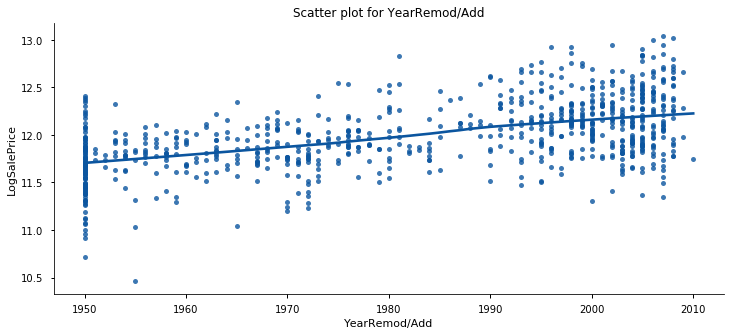

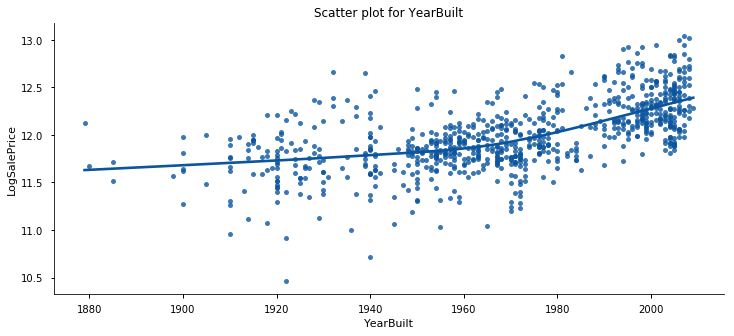

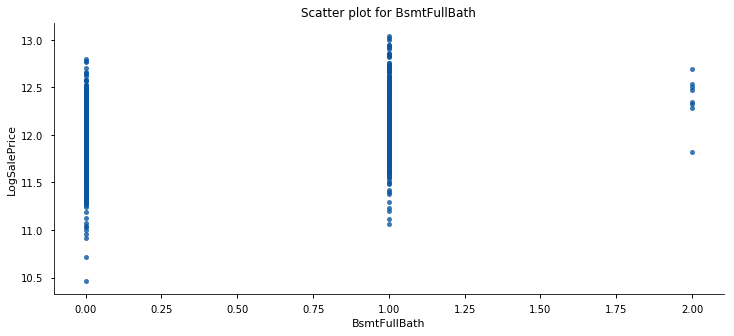

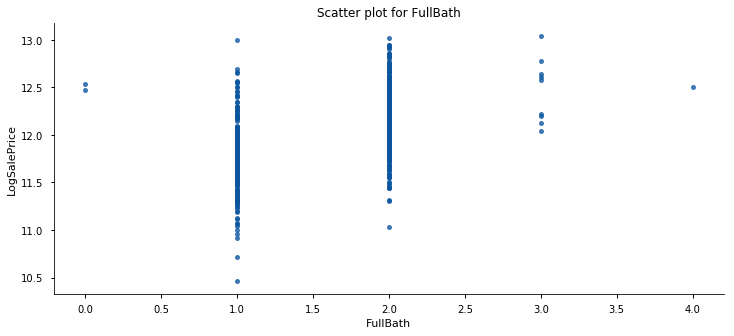

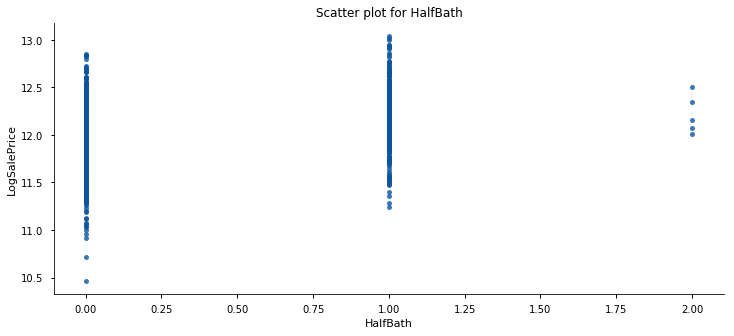

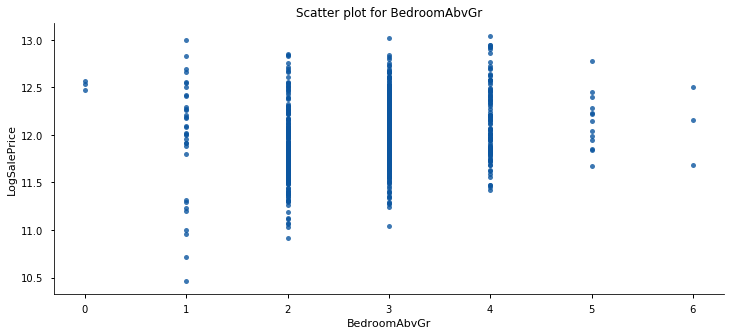

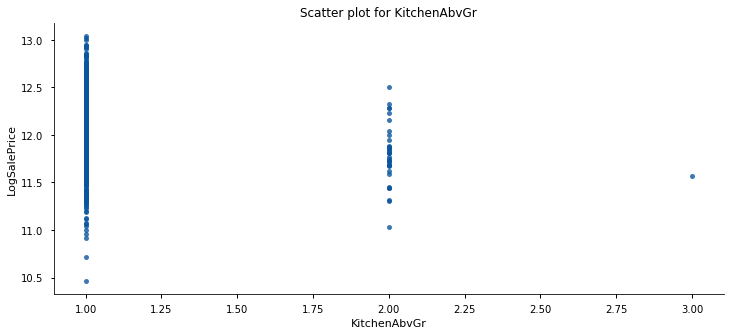

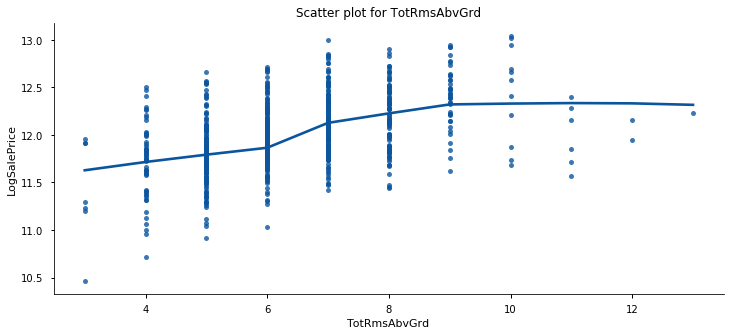

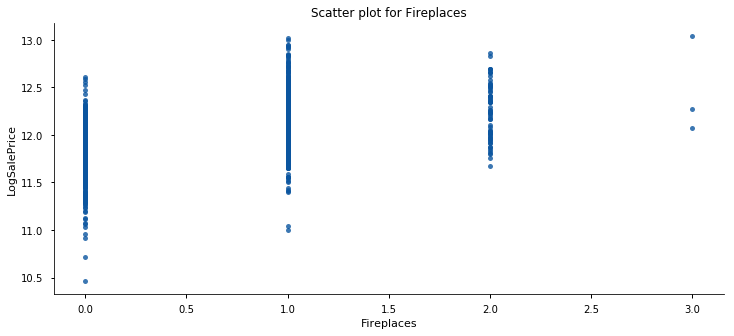

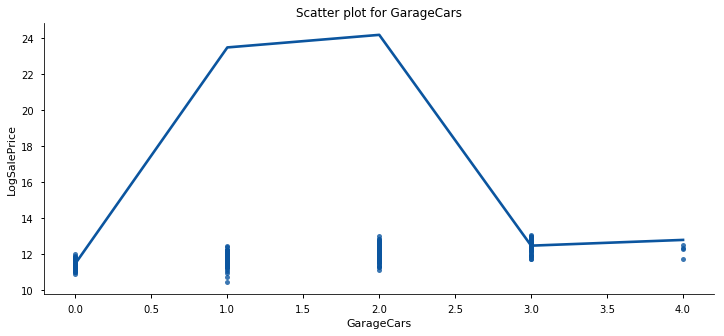

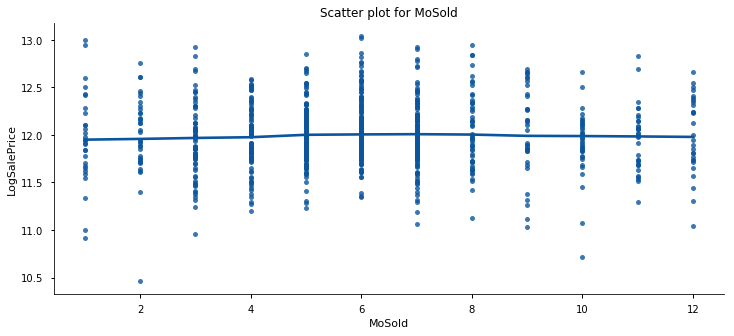

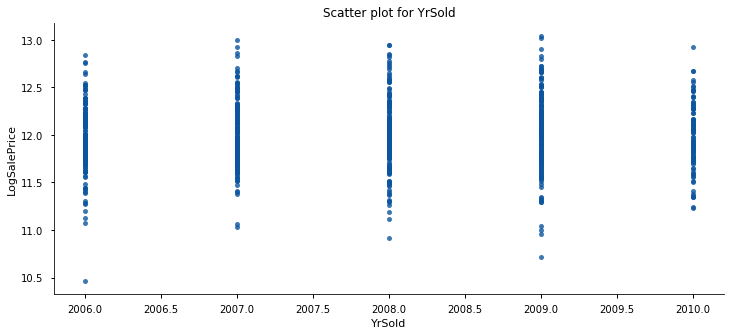

In [26]:
#Create regression plots of discrete variables and save output.
#There is an approximately linear trend for almost all discrete variables, except for YrSold, MoSold (as expected) and KitchenAbvGr.
#FullBath, GarageCars, TotRmsAbrGrd, BedroomAbvGr have non-linear trends in the box plots. 
#However, the sample size for some classes is insufficient. 
#Those variables are likely to have linear relationship with saleprice, if sample size is large enough.

for i in Discrete:
    fig,ax=plt.subplots(1,1,figsize=(12,5))
    sns.regplot(data[i], data['LogSalePrice'], scatter_kws = {'s': 25}, lowess=True, color=sns.color_palette('Blues')[-1])
    sns.despine()
    ax.set(ylabel='LogSalePrice', title = 'Scatter plot for {}'.format(i))
    plt.show()
    fig.savefig('{}.png'.format(i))

In [27]:
#Category count for those discrete variables that don't seem to have linear trends.

def count(cata_var):
    count = {}
    for i in cata_var.unique():
        count[i] = 0 
        for j in cata_var:
            if j == i:
                count[i] += 1
    return count

non_linear_discrete = ['FullBath', 'GarageCars', 'TotRmsAbvGrd', 'BedroomAbvGr']
for i in non_linear_discrete:
    print('{}:{}'.format(i,count(data[i])))

FullBath:{1: 396, 2: 389, 3: 9, 0: 2, 4: 1}
GarageCars:{1.0: 237, 2.0: 444, 3.0: 77, 0.0: 35, 4.0: 4}
TotRmsAbvGrd:{6: 213, 8: 90, 5: 182, 7: 190, 10: 11, 4: 56, 3: 7, 9: 39, 11: 6, 12: 2, 13: 1}
BedroomAbvGr:{3: 429, 4: 108, 2: 208, 1: 33, 0: 3, 5: 13, 6: 3}


#### Ordinal Variables

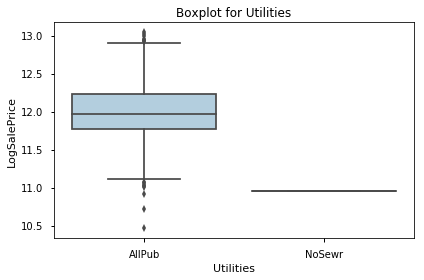

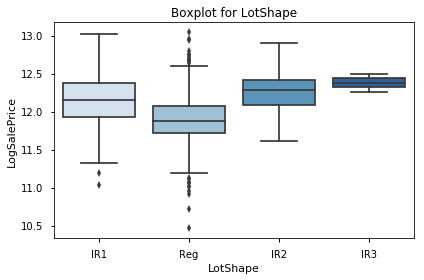

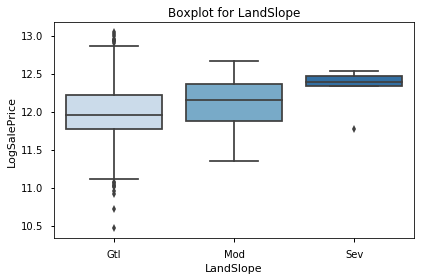

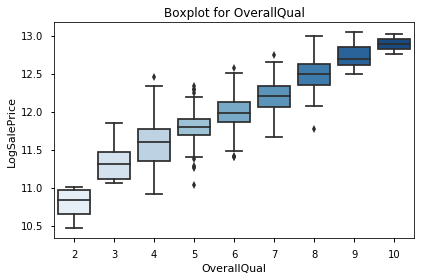

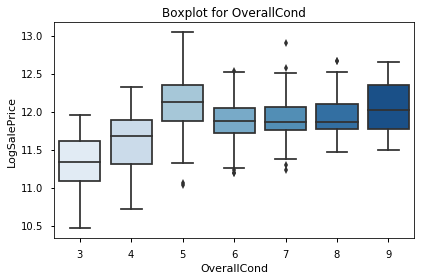

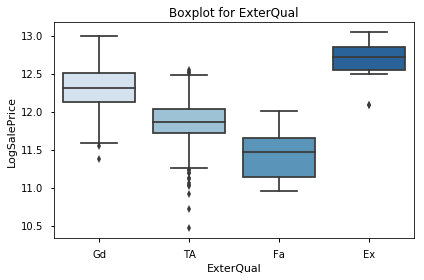

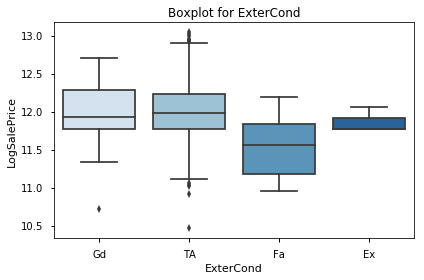

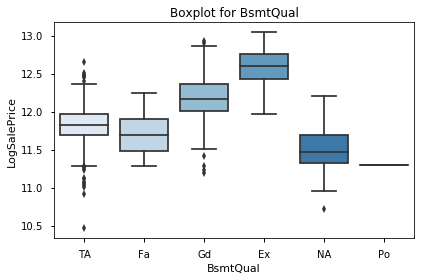

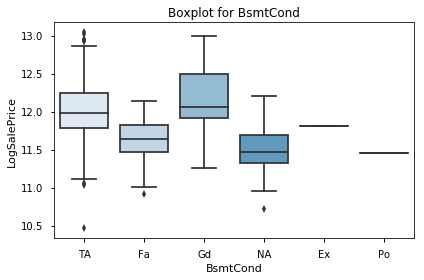

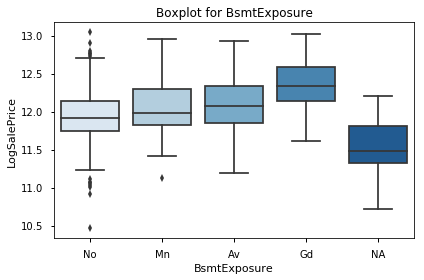

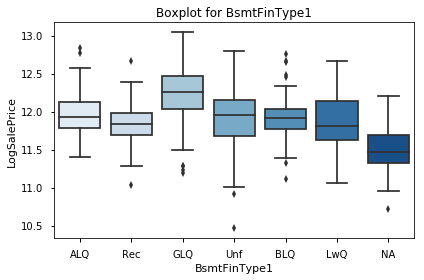

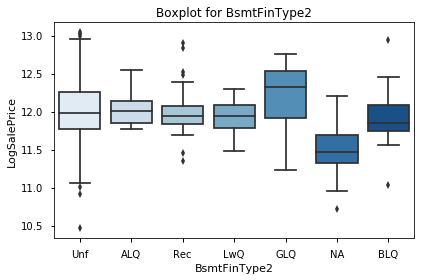

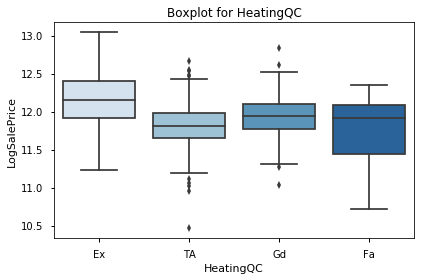

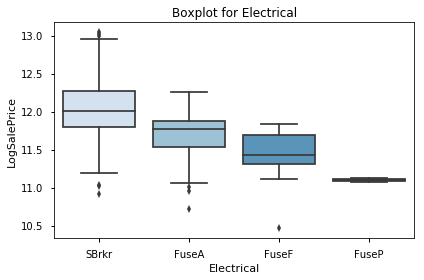

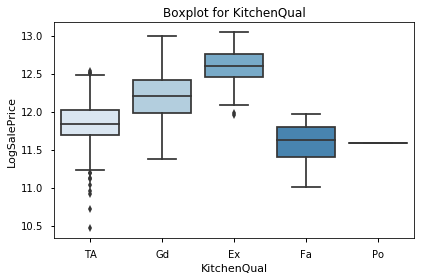

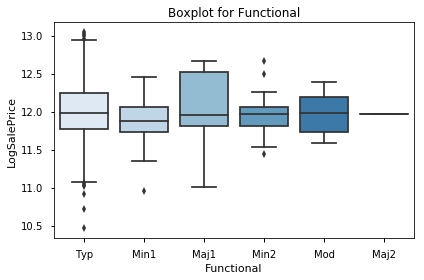

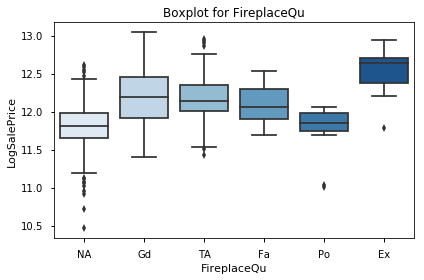

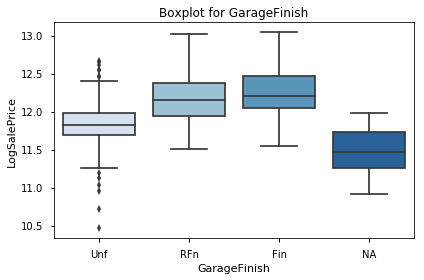

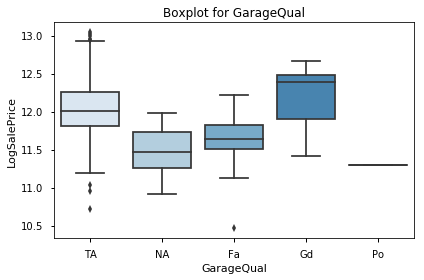

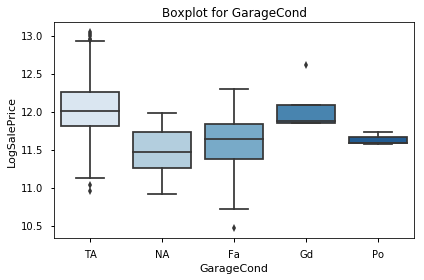

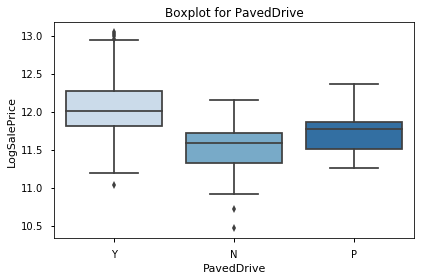

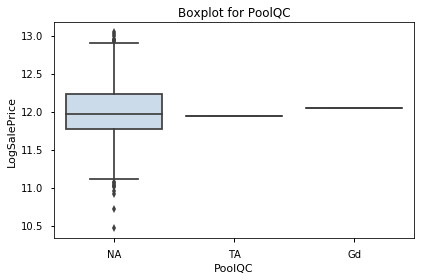

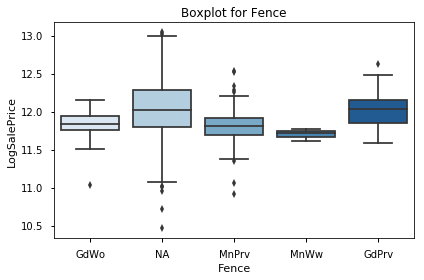

In [28]:
#Draw box plots for ordinal variables and save output as picture.
#There is linear trend for Quality variables (OverallQual, KitchenQual, FireplaceQC, etc.)
#Treat them as numerical rather than nominal or ordinal.

for i in Ordinal:
    fig, ax= plt.subplots()
    sns.boxplot(data[i], data['LogSalePrice'], ax=ax, palette='Blues')
    ax.set(ylabel='LogSalePrice', title='Boxplot for {}'.format(i))
    plt.tight_layout()
    plt.show()
    fig.savefig('{}.png'.format(i))

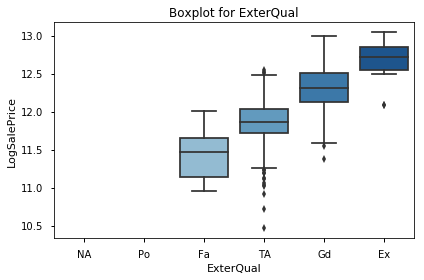

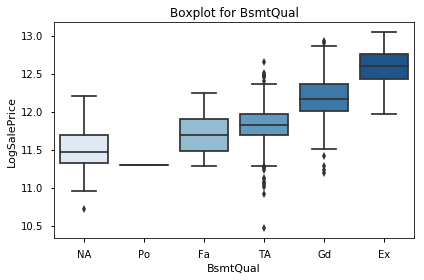

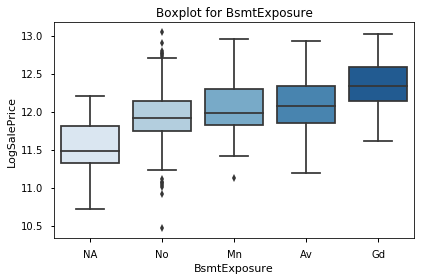

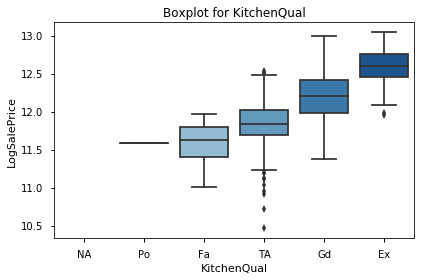

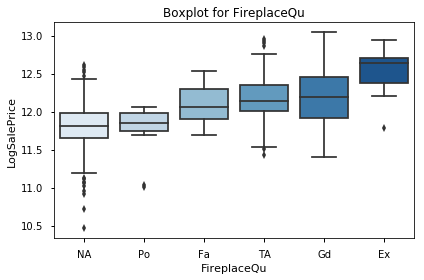

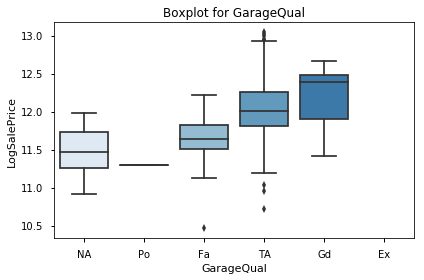

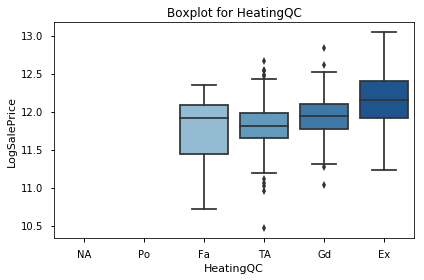

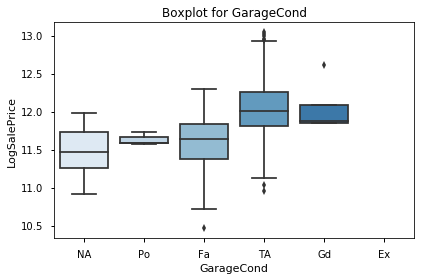

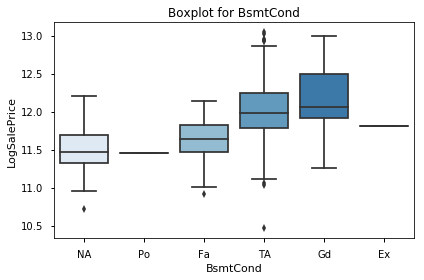

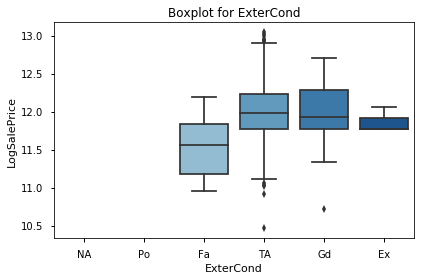

In [29]:
#Box plots of all "quality" variables and graphed in ascending order and saved as pictures.

Quality_terms = ['ExterQual', 'BsmtQual', 'BsmtExposure', 'KitchenQual', 'FireplaceQu', 
                 'GarageQual', 'HeatingQC', 'GarageCond', 'BsmtCond', 'ExterCond']
Order1 = ['NA','Po','Fa','TA','Gd','Ex']
Order2 = ['NA','No','Mn','Av','Gd']
for i in Quality_terms:
    if i != 'BsmtExposure':
        fig, ax= plt.subplots()
        sns.boxplot(data[i], data['LogSalePrice'], ax=ax, order = Order1, palette='Blues')
        ax.set(ylabel='LogSalePrice', title='Boxplot for {}'.format(i))
        plt.tight_layout()
        plt.show()
        fig.savefig('{} in order.png'.format(i))
    if i == 'BsmtExposure':
        fig, ax= plt.subplots()
        sns.boxplot(data[i], data['LogSalePrice'], ax=ax, order = Order2, palette='Blues')
        ax.set(ylabel='LogSalePrice', title='Boxplot for {}'.format(i))
        plt.tight_layout()
        plt.show()
        fig.savefig('{} in order.png'.format(i))

In [30]:
#Count data breakdown by catagory/class.
#For some classes in a variable, the sample size is insufficient.

for i in Ordinal:
    print('{}:{}'.format(i,count(data[i])))

Utilities:{'AllPub': 796, 'NoSewr': 1}
LotShape:{'IR1': 272, 'Reg': 502, 'IR2': 21, 'IR3': 2}
LandSlope:{'Gtl': 754, 'Mod': 38, 'Sev': 5}
OverallQual:{5: 246, 7: 146, 6: 220, 8: 93, 4: 58, 9: 17, 3: 11, 2: 4, 10: 2}
OverallCond:{8: 49, 5: 414, 6: 171, 7: 113, 4: 27, 3: 15, 9: 8}
ExterQual:{'Gd': 239, 'TA': 535, 'Fa': 10, 'Ex': 13}
ExterCond:{'Gd': 93, 'TA': 687, 'Fa': 14, 'Ex': 3}
BsmtQual:{'TA': 389, 'Fa': 19, 'Gd': 316, 'Ex': 51, 'NA': 21, 'Po': 1}
BsmtCond:{'TA': 722, 'Fa': 26, 'Gd': 26, 'NA': 21, 'Ex': 1, 'Po': 1}
BsmtExposure:{'No': 527, 'Mn': 75, 'Av': 104, 'Gd': 69, 'NA': 22}
BsmtFinType1:{'ALQ': 138, 'Rec': 83, 'GLQ': 220, 'Unf': 209, 'BLQ': 78, 'LwQ': 48, 'NA': 21}
BsmtFinType2:{'Unf': 669, 'ALQ': 13, 'Rec': 33, 'LwQ': 23, 'GLQ': 13, 'NA': 21, 'BLQ': 25}
HeatingQC:{'Ex': 378, 'TA': 245, 'Gd': 148, 'Fa': 26}
Electrical:{'SBrkr': 721, 'FuseA': 62, 'FuseF': 12, 'FuseP': 2}
KitchenQual:{'TA': 444, 'Gd': 302, 'Ex': 32, 'Fa': 18, 'Po': 1}
Functional:{'Typ': 739, 'Min1': 26, 'Maj1': 

### Nominal Variables

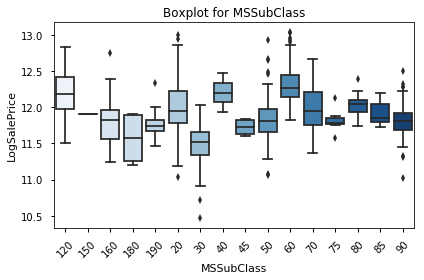

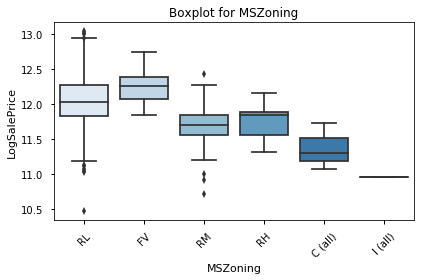

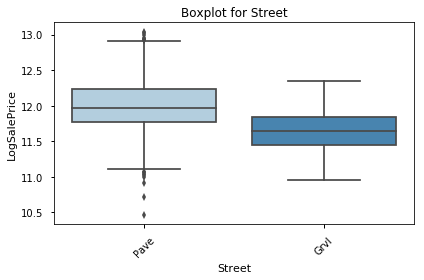

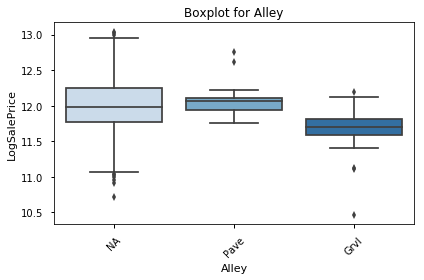

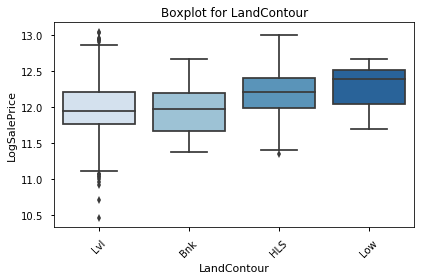

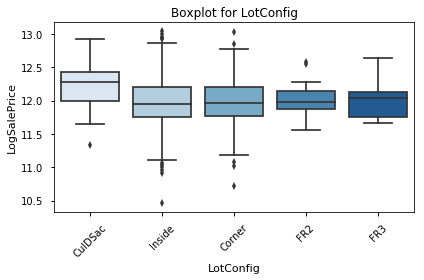

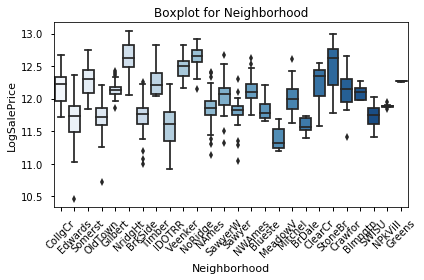

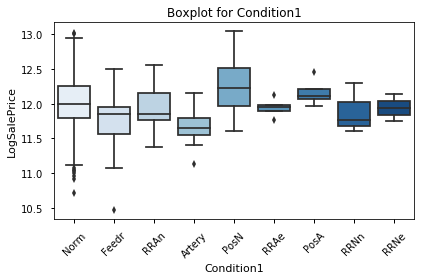

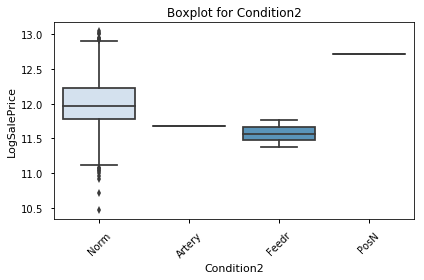

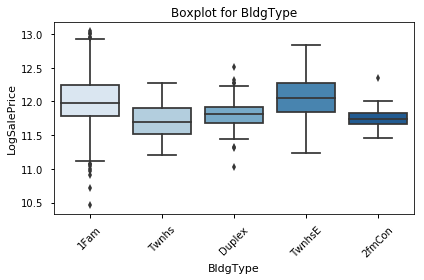

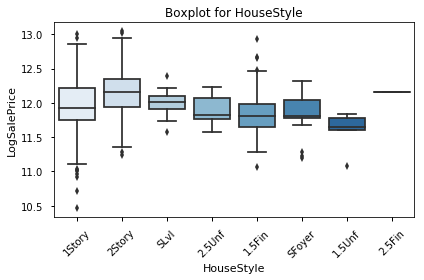

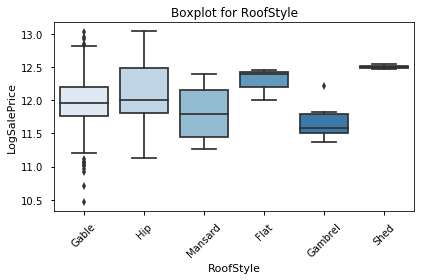

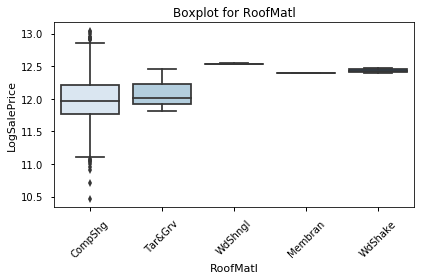

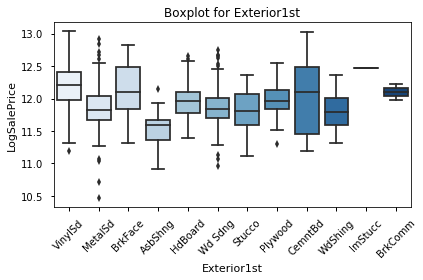

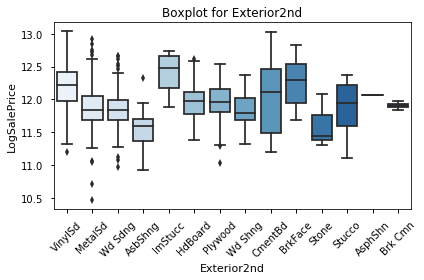

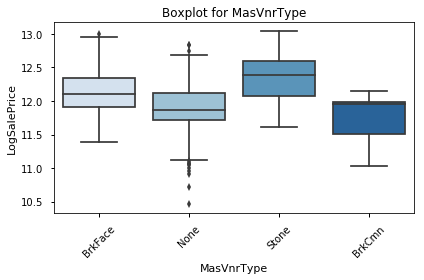

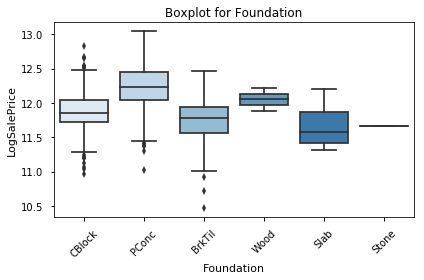

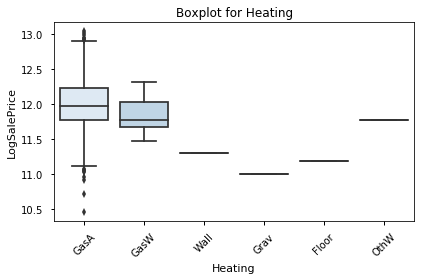

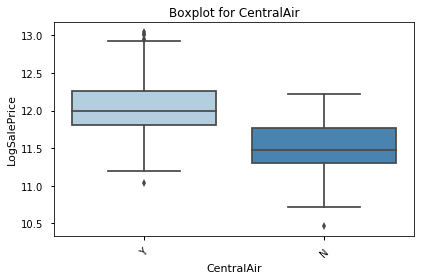

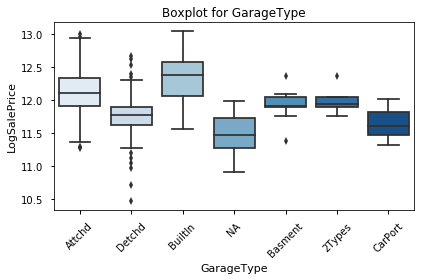

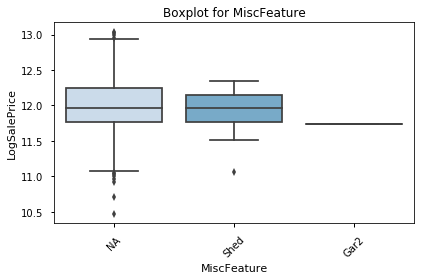

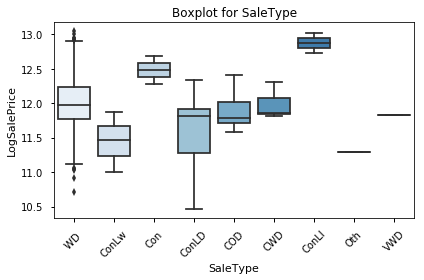

In [31]:
#Box plots of remaining nominal variables.

for i in Nominal:
    fig, ax= plt.subplots()
    sns.boxplot(data[i], data['LogSalePrice'], data=data, ax=ax, palette='Blues')
    ax.set(ylabel='LogSalePrice', title='Boxplot for {}'.format(i))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    fig.savefig('boxplots for nominal {}.png'.format(i))

In [32]:
#Count data breakdown by category.

for i in Nominal:
    print('{}:{}'.format(i,count(data[i])))

MSSubClass:{'20': 291, '60': 146, '160': 40, '75': 6, '50': 84, '30': 40, '90': 31, '180': 7, '190': 12, '120': 47, '70': 37, '80': 31, '85': 18, '40': 2, '45': 4, '150': 1}
MSZoning:{'RL': 622, 'FV': 38, 'RM': 124, 'RH': 9, 'C (all)': 3, 'I (all)': 1}
Street:{'Pave': 793, 'Grvl': 4}
Alley:{'NA': 742, 'Pave': 23, 'Grvl': 32}
LandContour:{'Lvl': 722, 'Bnk': 26, 'HLS': 31, 'Low': 18}
LotConfig:{'CulDSac': 49, 'Inside': 574, 'Corner': 149, 'FR2': 20, 'FR3': 5}
Neighborhood:{'CollgCr': 72, 'Edwards': 55, 'Somerst': 46, 'OldTown': 66, 'Gilbert': 37, 'NridgHt': 26, 'BrkSide': 28, 'Timber': 15, 'IDOTRR': 15, 'Veenker': 11, 'NoRidge': 22, 'NAmes': 136, 'SawyerW': 31, 'Sawyer': 41, 'NWAmes': 43, 'Blueste': 4, 'MeadowV': 10, 'Mitchel': 44, 'BrDale': 11, 'ClearCr': 18, 'StoneBr': 10, 'Crawfor': 30, 'Blmngtn': 5, 'SWISU': 12, 'NPkVill': 7, 'Greens': 2}
Condition1:{'Norm': 694, 'Feedr': 37, 'RRAn': 7, 'Artery': 29, 'PosN': 14, 'RRAe': 7, 'PosA': 4, 'RRNn': 3, 'RRNe': 2}
Condition2:{'Norm': 793, 'Ar

In [33]:
#Convert month to string because it is stored as numerical, but not treated as numerical.

data['MoSold'] = data['MoSold'].astype(str) 

#Delete year built, remodeled, and garage year built.

del data['YearBuilt']
del data['YearRemod/Add']
del data['GarageYrBlt']

In [34]:
#Duplicate data to keep record of previous version in case need to use it.

data_num = data.copy()

In [35]:
#Sort neighborhoods by mean.

neighbor_mean = data_num.groupby('Neighborhood')[['SalePrice']].apply(np.mean)
neighbor_mean.sort_values('SalePrice')

,SalePrice
Neighborhood,
MeadowV,89790.000000
BrDale,109272.727273
IDOTRR,111095.000000
OldTown,123706.818182
Edwards,126203.636364
SWISU,126291.666667
BrkSide,126909.821429
Sawyer,135542.878049
NAmes,143742.117647


In [36]:
#Import scip to compare Neighborhood Categories with Welch's t-tests assuming unequal variance.
#Group categories accordingly to decrease number of neighborhood categories.
#Significance level 10%

from scipy import stats

#Leave MeadowV

t, pvalue = stats.ttest_ind(data_num.loc[data_num['Neighborhood']=='MeadowV','SalePrice'],
                            data_num.loc[data_num['Neighborhood']=='BrDale','SalePrice'],equal_var=False)
print('MeadowV vs BrDale',pvalue)

#Combine BrDale and IDOTRR

t, pvalue = stats.ttest_ind(data_num.loc[data_num['Neighborhood']=='BrDale','SalePrice'],
                            data_num.loc[data_num['Neighborhood']=='IDOTRR','SalePrice'],equal_var=False)
print('BrDale vs IDOTRR',pvalue)

#Combine OldTown Edwards SWISU BrkSide

t, pvalue = stats.ttest_ind(data_num.loc[data_num['Neighborhood']=='OldTown','SalePrice'],
                            data_num.loc[data_num['Neighborhood']=='Edwards','SalePrice'],equal_var=False)
print('OldTown vs Edwards',pvalue) 
t, pvalue = stats.ttest_ind(data_num.loc[data_num['Neighborhood']=='OldTown','SalePrice'],
                            data_num.loc[data_num['Neighborhood']=='SWISU','SalePrice'],equal_var=False)
print('OldTown vs SWISU',pvalue)
t, pvalue = stats.ttest_ind(data_num.loc[data_num['Neighborhood']=='OldTown','SalePrice'],
                            data_num.loc[data_num['Neighborhood']=='BrkSide','SalePrice'],equal_var=False)
print('OldTown vs BrkSide',pvalue)
t, pvalue = stats.ttest_ind(data_num.loc[data_num['Neighborhood']=='Edwards','SalePrice'],
                            data_num.loc[data_num['Neighborhood']=='SWISU','SalePrice'],equal_var=False)
print('Edwards vs SWISU',pvalue)
t, pvalue = stats.ttest_ind(data_num.loc[data_num['Neighborhood']=='Edwards','SalePrice'],
                            data_num.loc[data_num['Neighborhood']=='BrkSide','SalePrice'],equal_var=False)
print('Edwards vs BrkSide',pvalue)
t, pvalue = stats.ttest_ind(data_num.loc[data_num['Neighborhood']=='SWISU','SalePrice'],
                            data_num.loc[data_num['Neighborhood']=='BrkSide','SalePrice'],equal_var=False)
print('SWISU vs BrkSide',pvalue)

#Combine Sawyer NAmes Blueste NPkVill

t, pvalue = stats.ttest_ind(data_num.loc[data_num['Neighborhood']=='Sawyer','SalePrice'],
                            data_num.loc[data_num['Neighborhood']=='NAmes','SalePrice'],equal_var=False)
print('Sawyer vs NAmes',pvalue)
t, pvalue = stats.ttest_ind(data_num.loc[data_num['Neighborhood']=='Sawyer','SalePrice'],
                            data_num.loc[data_num['Neighborhood']=='Blueste','SalePrice'],equal_var=False)
print('Sawyer vs Blueste',pvalue)
t, pvalue = stats.ttest_ind(data_num.loc[data_num['Neighborhood']=='Sawyer','SalePrice'],
                            data_num.loc[data_num['Neighborhood']=='NPkVill','SalePrice'],equal_var=False)
print('Sawyer vs NPkVill',pvalue)
t, pvalue = stats.ttest_ind(data_num.loc[data_num['Neighborhood']=='NAmes','SalePrice'],
                            data_num.loc[data_num['Neighborhood']=='Blueste','SalePrice'],equal_var=False)
print('NAmes vs Blueste',pvalue)
t, pvalue = stats.ttest_ind(data_num.loc[data_num['Neighborhood']=='NAmes','SalePrice'],
                            data_num.loc[data_num['Neighborhood']=='NPkVill','SalePrice'],equal_var=False)
print('NAmes vs NPkVill',pvalue)
t, pvalue = stats.ttest_ind(data_num.loc[data_num['Neighborhood']=='Blueste','SalePrice'],
                            data_num.loc[data_num['Neighborhood']=='NPkVill','SalePrice'],equal_var=False)
print('Blueste vs NPkVill',pvalue)

#Combine Mitchel SawyerW Blmngtn

t, pvalue = stats.ttest_ind(data_num.loc[data_num['Neighborhood']=='Mitchel','SalePrice'],
                            data_num.loc[data_num['Neighborhood']=='SawyerW','SalePrice'],equal_var=False)
print('Mitchel vs SawyerW',pvalue)
t, pvalue = stats.ttest_ind(data_num.loc[data_num['Neighborhood']=='Mitchel','SalePrice'],
                            data_num.loc[data_num['Neighborhood']=='Blmngtn','SalePrice'],equal_var=False)
print('Mitchel vs Blmngtn',pvalue)
t, pvalue = stats.ttest_ind(data_num.loc[data_num['Neighborhood']=='SawyerW','SalePrice'],
                            data_num.loc[data_num['Neighborhood']=='Blmngtn','SalePrice'],equal_var=False)
print('SawyerW vs Blmgtn',pvalue)

#Combine Gilbert NWAmes Crawfor CollgCr

t, pvalue = stats.ttest_ind(data_num.loc[data_num['Neighborhood']=='Gilbert','SalePrice'],
                            data_num.loc[data_num['Neighborhood']=='NWAmes','SalePrice'],equal_var=False)
print('Gilbert vs NWAmes',pvalue)
t, pvalue = stats.ttest_ind(data_num.loc[data_num['Neighborhood']=='Gilbert','SalePrice'],
                            data_num.loc[data_num['Neighborhood']=='Crawfor','SalePrice'],equal_var=False)
print('Gilbert vs Crawfor',pvalue)
t, pvalue = stats.ttest_ind(data_num.loc[data_num['Neighborhood']=='Gilbert','SalePrice'],
                            data_num.loc[data_num['Neighborhood']=='CollgCr','SalePrice'],equal_var=False)
print('Gilbert vs CollgCr',pvalue)
t, pvalue = stats.ttest_ind(data_num.loc[data_num['Neighborhood']=='NWAmes','SalePrice'],
                            data_num.loc[data_num['Neighborhood']=='Crawfor','SalePrice'],equal_var=False)
print('NWAmes vs Crawfor',pvalue)
t, pvalue = stats.ttest_ind(data_num.loc[data_num['Neighborhood']=='NWAmes','SalePrice'],
                            data_num.loc[data_num['Neighborhood']=='CollgCr','SalePrice'],equal_var=False)
print('NWAmes vs CollgCr',pvalue)
t, pvalue = stats.ttest_ind(data_num.loc[data_num['Neighborhood']=='Crawfor','SalePrice'],
                            data_num.loc[data_num['Neighborhood']=='CollgCr','SalePrice'],equal_var=False)
print('Crawfor vs CollgCr',pvalue)

#Combine Greens ClearCr Somerst Timber

t, pvalue = stats.ttest_ind(data_num.loc[data_num['Neighborhood']=='Greens','SalePrice'],
                            data_num.loc[data_num['Neighborhood']=='ClearCr','SalePrice'],equal_var=False)
print('Greens vs ClearCr',pvalue)
t, pvalue = stats.ttest_ind(data_num.loc[data_num['Neighborhood']=='Greens','SalePrice'],
                            data_num.loc[data_num['Neighborhood']=='Somerst','SalePrice'],equal_var=False)
print('Greens vs Somerst',pvalue)
t, pvalue = stats.ttest_ind(data_num.loc[data_num['Neighborhood']=='Greens','SalePrice'],
                            data_num.loc[data_num['Neighborhood']=='Timber','SalePrice'],equal_var=False)
print('Greens vs Timber',pvalue)
t, pvalue = stats.ttest_ind(data_num.loc[data_num['Neighborhood']=='ClearCr','SalePrice'],
                            data_num.loc[data_num['Neighborhood']=='Somerst','SalePrice'],equal_var=False)
print('ClearCr vs Somerst',pvalue)
t, pvalue = stats.ttest_ind(data_num.loc[data_num['Neighborhood']=='ClearCr','SalePrice'],
                            data_num.loc[data_num['Neighborhood']=='Timber','SalePrice'],equal_var=False)
print('ClearCr vs Timber',pvalue)
t, pvalue = stats.ttest_ind(data_num.loc[data_num['Neighborhood']=='Somerst','SalePrice'],
                            data_num.loc[data_num['Neighborhood']=='Timber','SalePrice'],equal_var=False)
print('Somerst vs Timber',pvalue)

#Leave Veenker

t, pvalue = stats.ttest_ind(data_num.loc[data_num['Neighborhood']=='Veenker','SalePrice'],
                            data_num.loc[data_num['Neighborhood']=='StoneBr','SalePrice'],equal_var=False)
print('Veenker vs StoneBr',pvalue)

#Combine StoneBr NoRidge NridgHt

t, pvalue = stats.ttest_ind(data_num.loc[data_num['Neighborhood']=='StoneBr','SalePrice'],
                            data_num.loc[data_num['Neighborhood']=='NoRidge','SalePrice'],equal_var=False)
print('StoneBr vs NoRidge',pvalue)
t, pvalue = stats.ttest_ind(data_num.loc[data_num['Neighborhood']=='StoneBr','SalePrice'],
                            data_num.loc[data_num['Neighborhood']=='NridgHt','SalePrice'],equal_var=False)
print('StoneBr vs NridgHt',pvalue)
t, pvalue = stats.ttest_ind(data_num.loc[data_num['Neighborhood']=='NoRidge','SalePrice'],
                            data_num.loc[data_num['Neighborhood']=='NridgHt','SalePrice'],equal_var=False)
print('NoRidge vs NridgHt',pvalue)

MeadowV vs BrDale 0.00682063650341
BrDale vs IDOTRR 0.871850888233
OldTown vs Edwards 0.693259730077
OldTown vs SWISU 0.711552688739
OldTown vs BrkSide 0.674443060196
Edwards vs SWISU 0.991399976305
Edwards vs BrkSide 0.935532808136
SWISU vs BrkSide 0.946338598138
Sawyer vs NAmes 0.0904580917132
Sawyer vs Blueste 0.693463657761
Sawyer vs NPkVill 0.0302955488708
NAmes vs Blueste 0.990184625832
NAmes vs NPkVill 0.542413647079
Blueste vs NPkVill 0.936619165103
Mitchel vs SawyerW 0.418146957705
Mitchel vs Blmngtn 0.352999512298
SawyerW vs Blmgtn 0.826452005165
Gilbert vs NWAmes 0.849032255937
Gilbert vs Crawfor 0.563579481088
Gilbert vs CollgCr 0.0756164566016
NWAmes vs Crawfor 0.678561192944
NWAmes vs CollgCr 0.175689311425
Crawfor vs CollgCr 0.560713043157
Greens vs ClearCr 0.913179441772
Greens vs Somerst 0.233012182493
Greens vs Timber 0.515151290917
ClearCr vs Somerst 0.618752817881
ClearCr vs Timber 0.64448821435
Somerst vs Timber 0.892548459827
Veenker vs StoneBr 0.634021019886
Ston

#### Correlation Matrix

In [37]:
#Show top 25 numerical variables by correlation to LogSalePrice.

pd.set_option('display.max_rows',300)
abs_correl = abs(data_num.corr().round(3)['LogSalePrice'])
abs_correl_sort = abs_correl.sort_values(ascending=False)
abs_correl_sort.head(27)
pd.DataFrame(abs_correl_sort.head(27))

,LogSalePrice
LogSalePrice,1.000
SalePrice,0.965
OverallQual,0.811
GrLivArea,0.727
GarageCars,0.671
GarageArea,0.662
TotalBsmtSF,0.616
1stFlrSF,0.596
AgeHouse,0.546
FullBath,0.543


In [38]:
#Get list so easy to copy and paste into cell below. Use 27 to get top 25 for correlation heatmap.

abs_correl_sort.head(27).index

Index(['LogSalePrice', 'SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars',
       'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'AgeHouse', 'FullBath',
       'Fireplaces', 'TotRmsAbvGrd', 'BsmtFinSF1', 'AgeGarage', 'MasVnrArea',
       'WoodDeckSF', 'HalfBath', 'OpenPorchSF', '2ndFlrSF', 'LotArea',
       'BsmtFullBath', 'BedroomAbvGr', 'BsmtUnfSF', 'EnclosedPorch',
       'KitchenAbvGr', 'LotFrontage', 'ScreenPorch'],
      dtype='object')

In [39]:
#Put top 25 numerical variables in a list.

top_variables_25 = ['LogSalePrice', 'OverallQual', 'GrLivArea', 'GarageCars',
       'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'AgeHouse', 'FullBath',
       'Fireplaces', 'TotRmsAbvGrd', 'BsmtFinSF1', 'AgeGarage', 'MasVnrArea',
       'WoodDeckSF', 'HalfBath', 'OpenPorchSF', '2ndFlrSF', 'LotArea',
       'BsmtFullBath', 'BedroomAbvGr', 'BsmtUnfSF', 'EnclosedPorch',
       'KitchenAbvGr', 'LotFrontage', 'ScreenPorch']

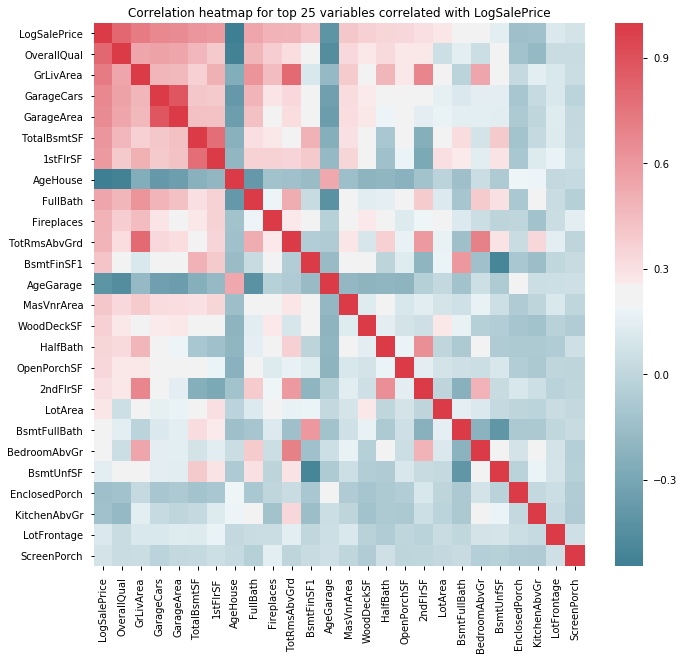

In [40]:
#Create heatmap of top 25 numerical variables. Note this is before dummy variable creation and simply to have an idea of
#numerical relationships.

data_num[top_variables_25].corr().round(4)
fig, ax = plt.subplots(figsize = (11,10))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(data_num[top_variables_25].corr(), ax=ax, cmap=cmap)
ax.set(title='Correlation heatmap for top 25 variables correlated with LogSalePrice')
fig.savefig('Correlation heatmap before feature engineering (top 25).png')